In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-creditscoring/Processed Dataset 2010.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/dataset-for-creditscoring/Processed Dataset 2010.csv')

print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("First few rows:")
print(df.head())

Dataset shape: (3454, 42)
Columns: Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'Q203_1',
       'Q207a', 'Q207b', 'Q301a_1', 'Q301a_2', 'Q301a_3', 'Q301a_4', 'Q301a_5',
       'Q301a_6', 'Q301a_7', 'Q301a_8', 'Q303', 'Q304_1', 'Q401_1', 'Q503',
       'Q505b', 'Q506', 'Q507', 'Q601a', 'Q601b_1', 'Q1201', 'Q1202', 'Q1208',
       'Q1209_1', 'Q1213', 'Q1214', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2'],
      dtype='object')
First few rows:
    ID   Weight_Ind         Region Area_type  Household Number  \
0  1.0  1229.015015  Greater Accra     Urban               2.0   
1  2.0  1229.015015  Greater Accra     Urban               1.0   
2  3.0  1229.015015  Greater Accra     Urban               4.0   
3  4.0  1229.015015  Greater Accra     Urban               5.0   
4  5.0  1229.015015  Greater Accra     Urban               3.0   

                                 

In [3]:
df.isnull().sum()

ID                     1
Weight_Ind             1
Region                 1
Area_type              1
Household Number       1
Q203_1                 1
Q207a                  1
Q207b                  1
Q301a_1                1
Q301a_2                1
Q301a_3                1
Q301a_4                1
Q301a_5                1
Q301a_6                1
Q301a_7                1
Q301a_8                1
Q303                   1
Q304_1              3355
Q401_1              1375
Q503                   1
Q505b               1972
Q506                2268
Q507                2288
Q601a                  1
Q601b_1             1220
Q1201                  1
Q1202                  1
Q1208               2515
Q1209_1              929
Q1213                  6
Q1214                  1
Age                    1
Gender                 1
Income                 1
Marital                1
Banked/Unbanked        0
Credit                 0
Saving                 0
Remittances            0
Education              0


In [4]:
df.dtypes

ID                  float64
Weight_Ind          float64
Region               object
Area_type            object
Household Number    float64
Q203_1               object
Q207a                object
Q207b                object
Q301a_1              object
Q301a_2              object
Q301a_3              object
Q301a_4              object
Q301a_5              object
Q301a_6              object
Q301a_7              object
Q301a_8              object
Q303                 object
Q304_1               object
Q401_1               object
Q503                 object
Q505b                object
Q506                 object
Q507                 object
Q601a                object
Q601b_1              object
Q1201                object
Q1202                object
Q1208                object
Q1209_1              object
Q1213                object
Q1214                object
Age                  object
Gender               object
Income               object
Marital              object
Banked/Unbanked     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3453 non-null   float64
 1   Weight_Ind        3453 non-null   float64
 2   Region            3453 non-null   object 
 3   Area_type         3453 non-null   object 
 4   Household Number  3453 non-null   float64
 5   Q203_1            3453 non-null   object 
 6   Q207a             3453 non-null   object 
 7   Q207b             3453 non-null   object 
 8   Q301a_1           3453 non-null   object 
 9   Q301a_2           3453 non-null   object 
 10  Q301a_3           3453 non-null   object 
 11  Q301a_4           3453 non-null   object 
 12  Q301a_5           3453 non-null   object 
 13  Q301a_6           3453 non-null   object 
 14  Q301a_7           3453 non-null   object 
 15  Q301a_8           3453 non-null   object 
 16  Q303              3453 non-null   object 


In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Region:
['Greater Accra' 'Ashanti' 'Western' 'Central' 'Volta' 'Eastern'
 'Upper West' 'Brong Ahafo' 'Northern' 'Upper East' nan]

Unique values in Area_type:
['Urban' 'Rural' nan]

Unique values in Q203_1:
['Broker /Representative from a financial institution' 'Television'
 'Friends/Colleagues' 'Radio' "Can't remember/ Don't know"
 'Household members' 'Banks or other financial institutions' 'Billboards'
 'Union Leaders' 'Flyers and brochures' 'University/School'
 'Community groups/society' 'Newspaper' 'Internet'
 'Not answered/Missing data' 'Magazines' 'Susu operators'
 'Community leaders' nan]

Unique values in Q207a:
['Yes' 'No' 'Not answered/Missing data' nan]

Unique values in Q207b:
['Yes' 'No' 'Not answered/Missing data' nan]

Unique values in Q301a_1:
['Never had' 'Have now' 'Not answered/Missing data'
 'Used to but no longer have' nan]

Unique values in Q301a_2:
['Never had' 'Have now' 'Not answered/Missing data'
 'Used to but no longer have' nan]

Unique val

In [7]:
#Fill empty numerical rows with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

#Ffill empty categorical rows with Unknown
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [8]:
#Drop duplicates
df.drop_duplicates()

,ID,Weight_Ind,Region,Area_type,Household Number,Q203_1,Q207a,Q207b,Q301a_1,Q301a_2,...,Gender,Income,Marital,Banked/Unbanked,Credit,Saving,Remittances,Education,Income_Sources,Age2
0,1.0,1229.015015,Greater Accra,Urban,2.0,Broker /Representative from a financial instit...,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Credit from family and friends,Saving at bank,Not remitting,Primary education,Formally employed Private,46+ yrs
1,2.0,1229.015015,Greater Accra,Urban,1.0,Broker /Representative from a financial instit...,Yes,Yes,Never had,Never had,...,Male,Yes,Divorced,Banked,Credit from family and friends,Saving at bank,Remitting informally,Primary education,Farming and Fishing,31 - 35 yrs
2,3.0,1229.015015,Greater Accra,Urban,4.0,Television,Yes,Yes,Never had,Never had,...,Female,Yes,Never married,Informal,Not borrowing,Saving informally,Not remitting,Secondary education,Self employed,31 - 35 yrs
3,4.0,1229.015015,Greater Accra,Urban,5.0,Television,Yes,Yes,Never had,Never had,...,Female,Yes,Married,Banked,Not borrowing,Saving at bank,Not remitting,No formal education,Self employed,41 - 45 yrs
4,5.0,1229.015015,Greater Accra,Urban,3.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Not borrowing,Saving at bank,Not remitting,Primary education,Self employed,46+ yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,93425.0,4267.821057,Upper East,Rural,2.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Credit from bank,Saving at bank,Remiting through family and friends,No formal education,Other Income,46+ yrs
3450,99262.0,9236.233766,Greater Accra,Urban,1.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Never married,Other formal (non-bank),Not borrowing,Not saving,Remitting through other formal (non-bank),Secondary education,Informally employed,26 - 30 yrs
3451,99416.0,2968.789437,Greater Accra,Urban,8.0,Banks or other financial institutions,Yes,Yes,Never had,Never had,...,Female,Yes,Separated,Informal,Not borrowing,Saving informally,Not remitting,Primary education,Self employed,46+ yrs
3452,99992.0,1644.672484,Upper East,Rural,2.0,Friends/Colleagues,Yes,No,Never had,Never had,...,Male,Yes,Widowed,Excluded,Not borrowing,Saving at home,Remiting through family and friends,No formal education,Farming and Fishing,46+ yrs


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3454 non-null   float64
 1   Weight_Ind        3454 non-null   float64
 2   Region            3454 non-null   object 
 3   Area_type         3454 non-null   object 
 4   Household Number  3454 non-null   float64
 5   Q203_1            3454 non-null   object 
 6   Q207a             3454 non-null   object 
 7   Q207b             3454 non-null   object 
 8   Q301a_1           3454 non-null   object 
 9   Q301a_2           3454 non-null   object 
 10  Q301a_3           3454 non-null   object 
 11  Q301a_4           3454 non-null   object 
 12  Q301a_5           3454 non-null   object 
 13  Q301a_6           3454 non-null   object 
 14  Q301a_7           3454 non-null   object 
 15  Q301a_8           3454 non-null   object 
 16  Q303              3454 non-null   object 


In [10]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'Q203_1',
       'Q207a', 'Q207b', 'Q301a_1', 'Q301a_2', 'Q301a_3', 'Q301a_4', 'Q301a_5',
       'Q301a_6', 'Q301a_7', 'Q301a_8', 'Q303', 'Q304_1', 'Q401_1', 'Q503',
       'Q505b', 'Q506', 'Q507', 'Q601a', 'Q601b_1', 'Q1201', 'Q1202', 'Q1208',
       'Q1209_1', 'Q1213', 'Q1214', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2'],
      dtype='object')

In [11]:
#Rename columns appropriately
df.columns = ['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'how_get_financial_info',
       'involved_financial_decisions', 'has_money_to_spend', 'bank_current_account', 'bank_investment_account', 'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card', 'used_someone_else_bank_account', 'reason_using_someone_else_account', 'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions', 'other_activities_on_way_to_financial_institutions', 'time_spent_going_to_financial_institutions', 'currently_saving', 'how_people_save', 'main_income_earner', 'how_income_received', 'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income', 'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2']

In [12]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number',
       'how_get_financial_info', 'involved_financial_decisions',
       'has_money_to_spend', 'bank_current_account', 'bank_investment_account',
       'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card',
       'used_someone_else_bank_account', 'reason_using_someone_else_account',
       'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions',
       'other_activities_on_way_to_financial_institutions',
       'time_spent_going_to_financial_institutions', 'currently_saving',
       'how_people_save', 'main_income_earner', 'how_income_received',
       'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income',
       'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
  

In [13]:
#Replacing any other value in Banked/Unbanked which is not banked as Unbanked
df['Banked/Unbanked'].replace({'Informal':'Unbanked', 'Excluded':'Unbanked',
                               'Other formal (non-bank)':'Unbanked'}, inplace=True)

<ipython-input-13-cdbf48c36a4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Banked/Unbanked'].replace({'Informal':'Unbanked', 'Excluded':'Unbanked',


In [14]:
#Making banked/unbanked a numerical column
df['Banked/Unbanked'].replace({'Unbanked':1, 'Banked':0}, inplace=True)

<ipython-input-14-bedb468139ca>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Banked/Unbanked'].replace({'Unbanked':1, 'Banked':0}, inplace=True)


Target variable distribution:
Banked/Unbanked
1    2264
0    1190
Name: count, dtype: int64


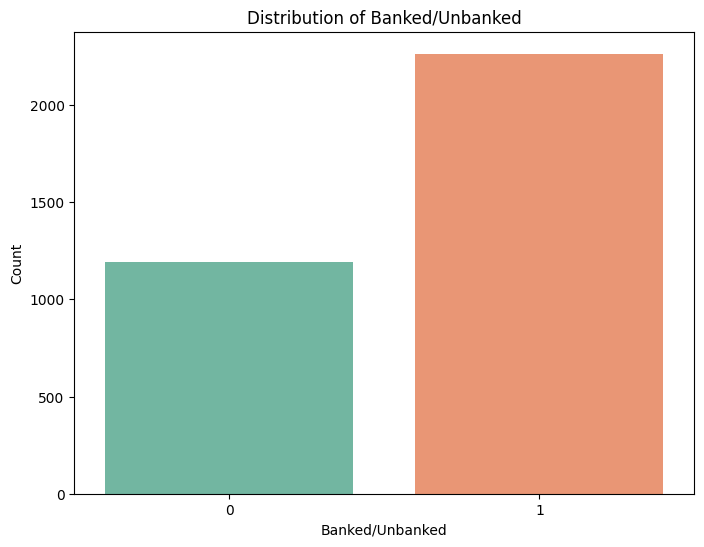

In [15]:
print("Target variable distribution:")
print(df['Banked/Unbanked'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Banked/Unbanked', palette='Set2')
plt.title("Distribution of Banked/Unbanked")
plt.xlabel("Banked/Unbanked")
plt.ylabel("Count")
plt.show()

Summary statistics for numerical features:
                 ID    Weight_Ind  Household Number  Banked/Unbanked
count   3454.000000   3454.000000       3454.000000      3454.000000
mean    2479.800232   3857.074913          2.786624         0.655472
std     7187.406435   1914.121496          1.758331         0.475283
min        1.000000    645.896282          1.000000         0.000000
25%      934.250000   2415.339458          2.000000         0.000000
50%     1883.000000   3523.011086          2.000000         1.000000
75%     2808.750000   4831.790435          4.000000         1.000000
max    99992.000000  12441.424730         15.000000         1.000000


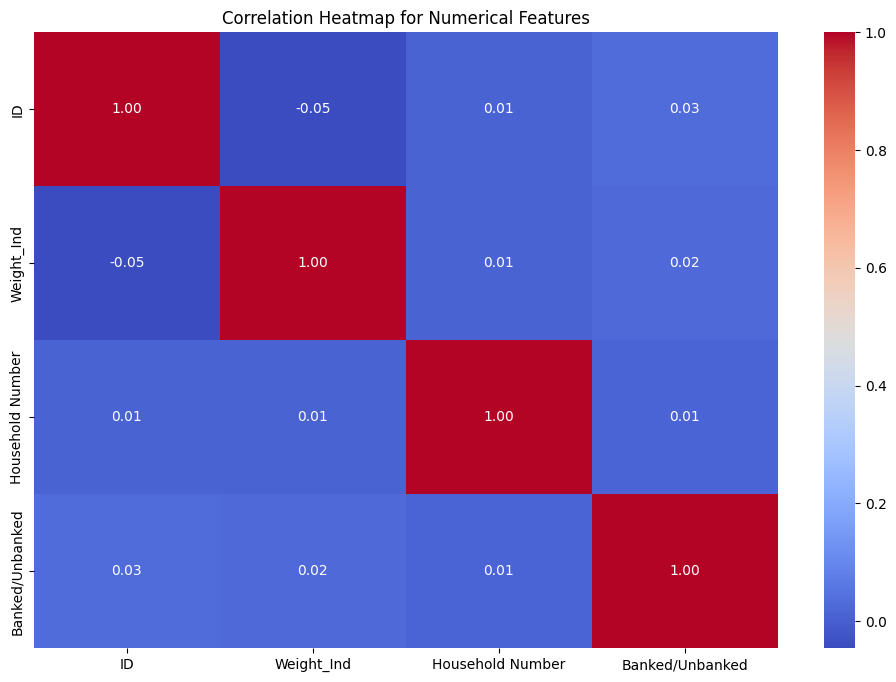

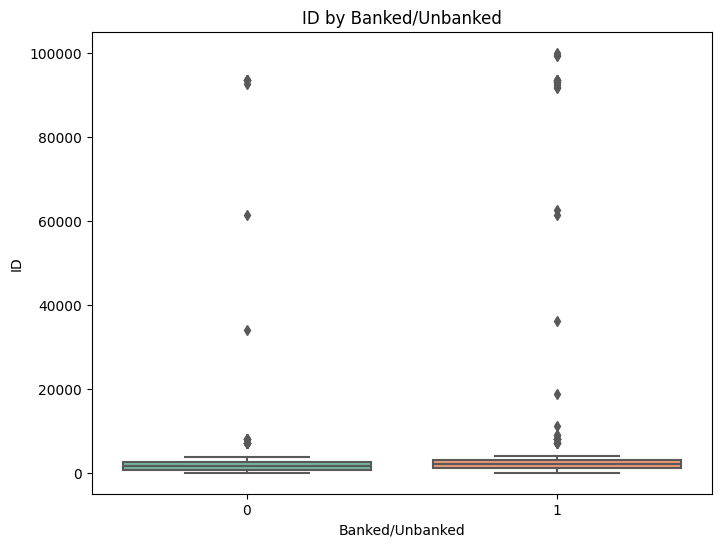

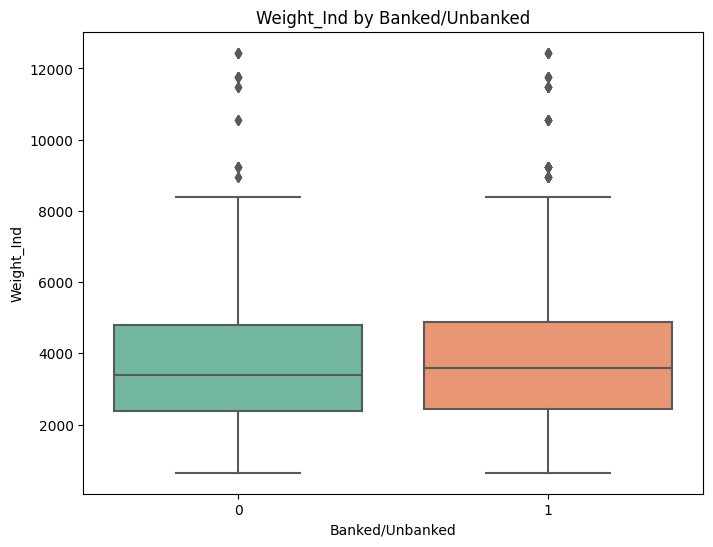

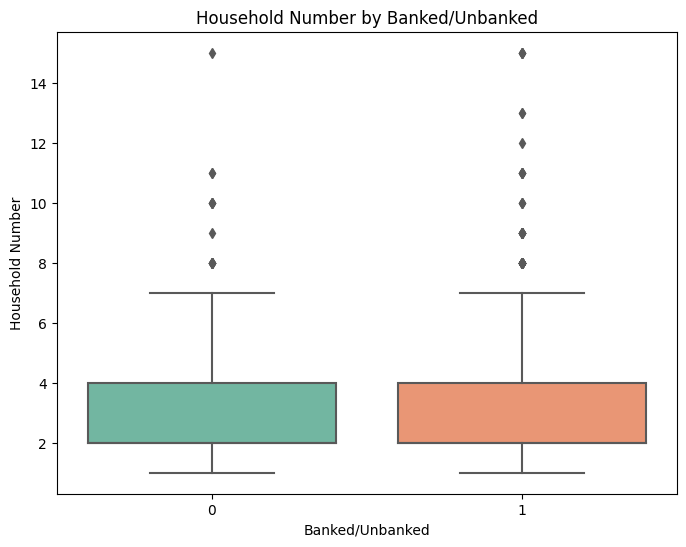

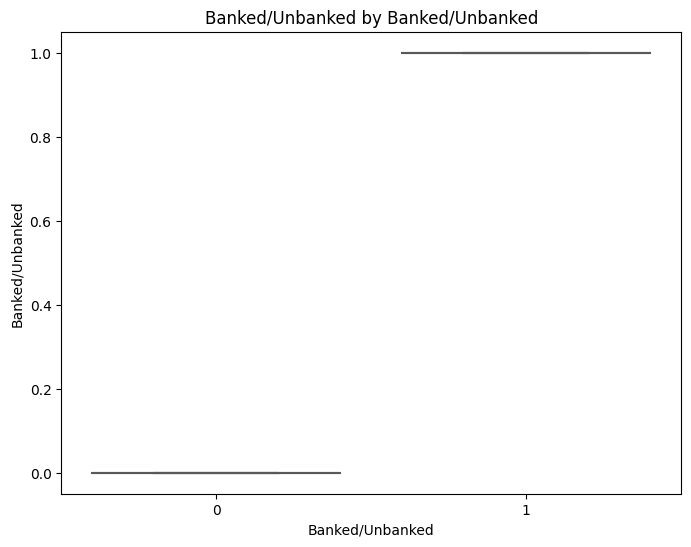

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Summary statistics for numerical features:")
print(df[numerical_cols].describe()) #Statistical information about numerical cols

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Banked/Unbanked', y=col, palette='Set2')
    plt.title(f"{col} by Banked/Unbanked")
    plt.show()

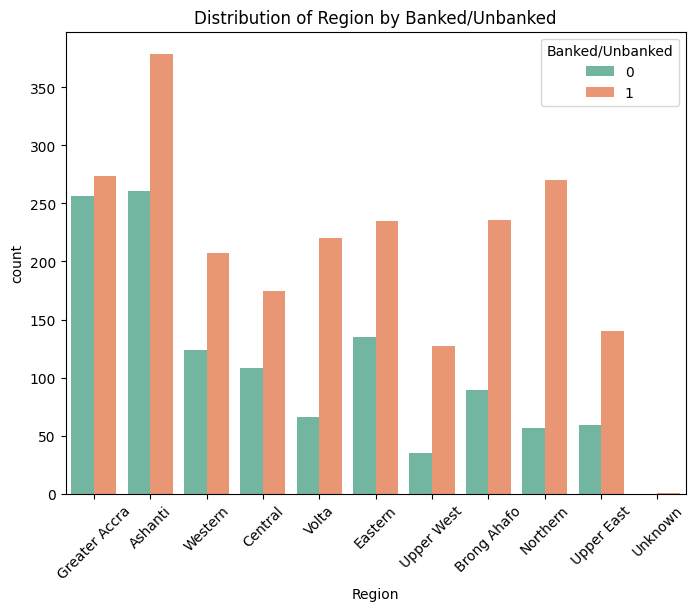

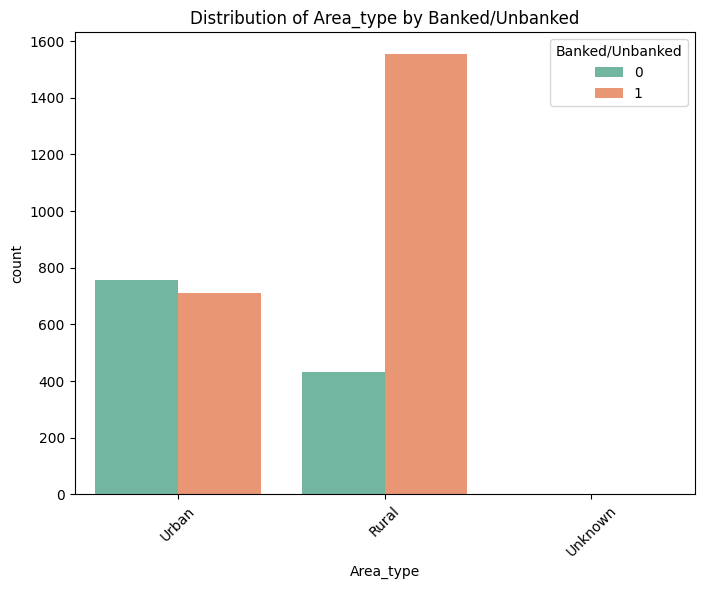

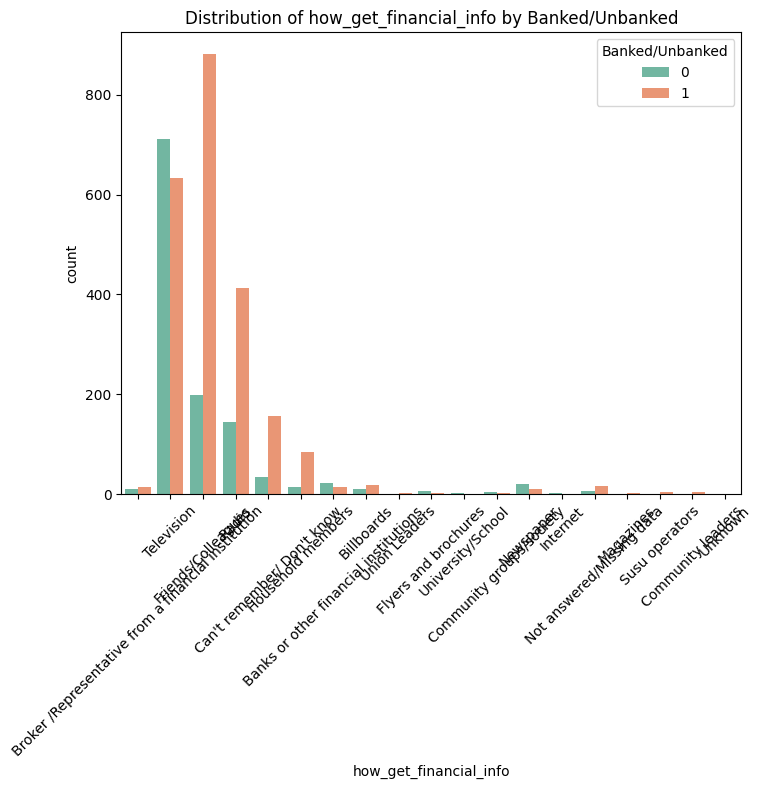

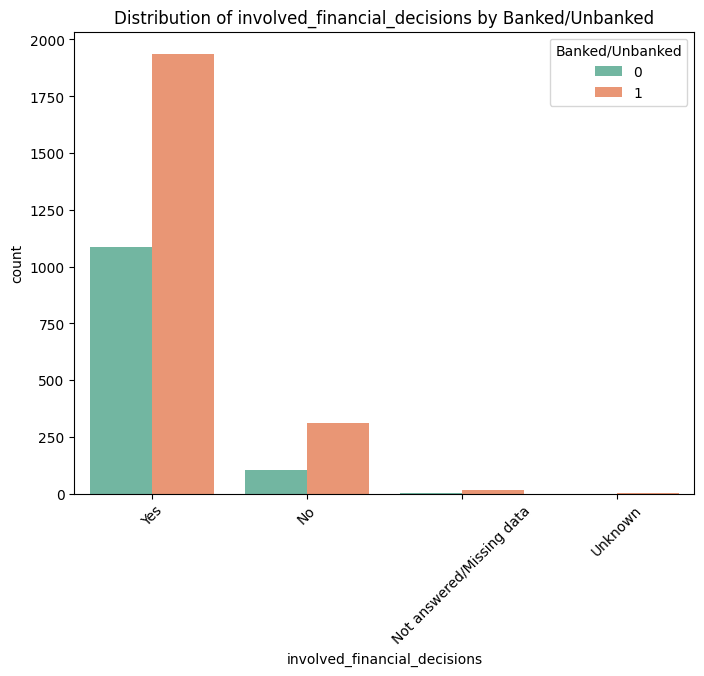

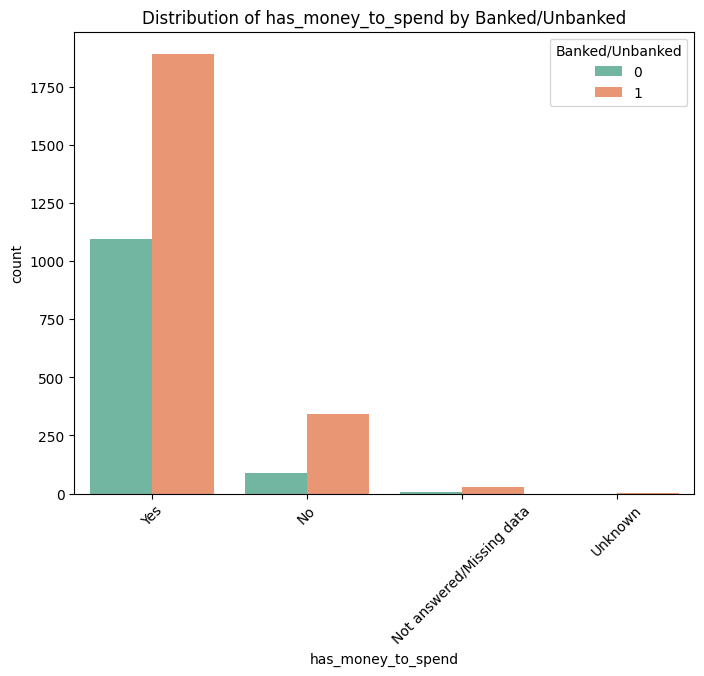

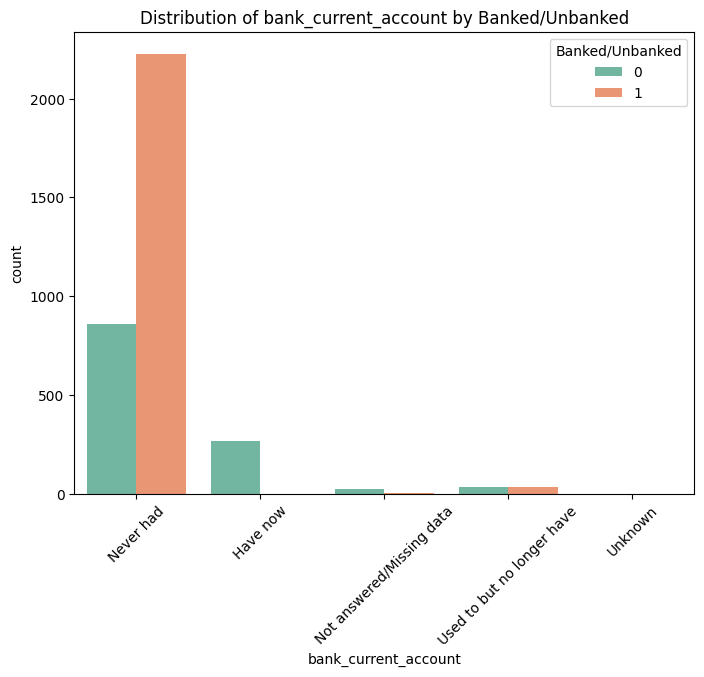

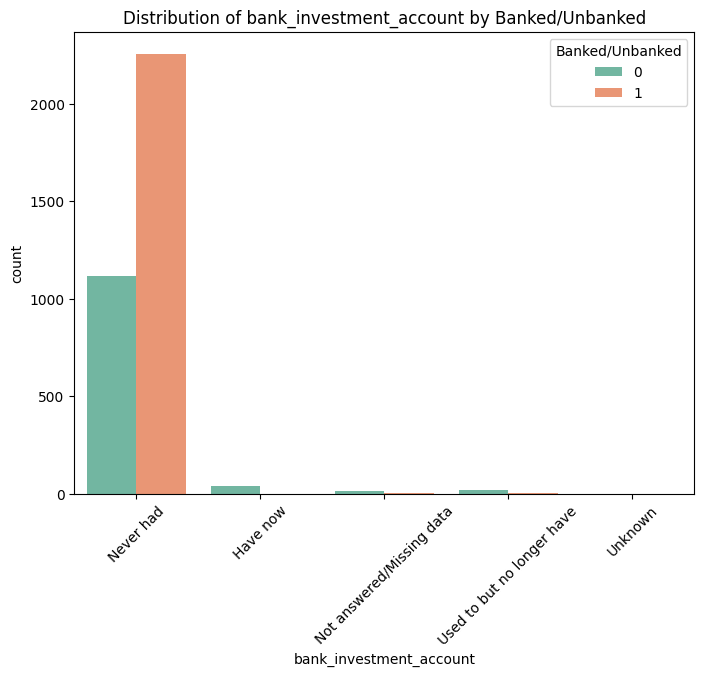

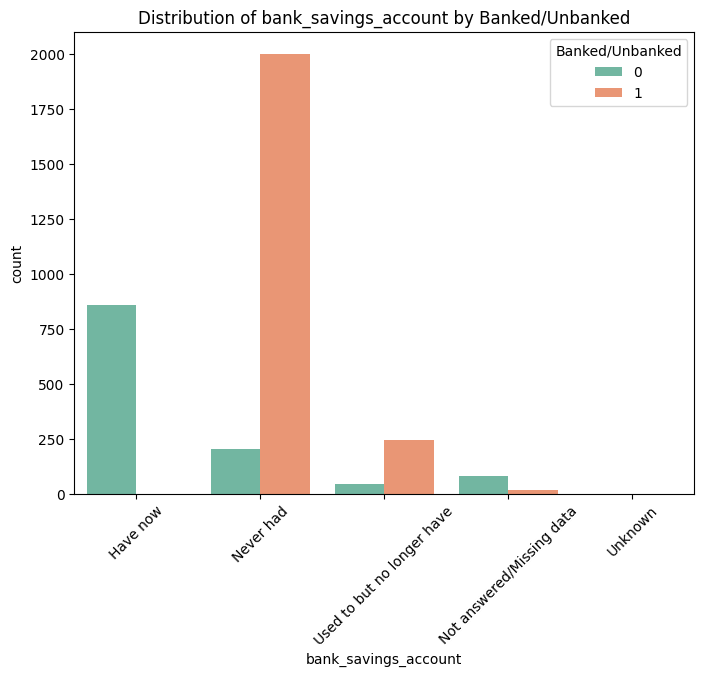

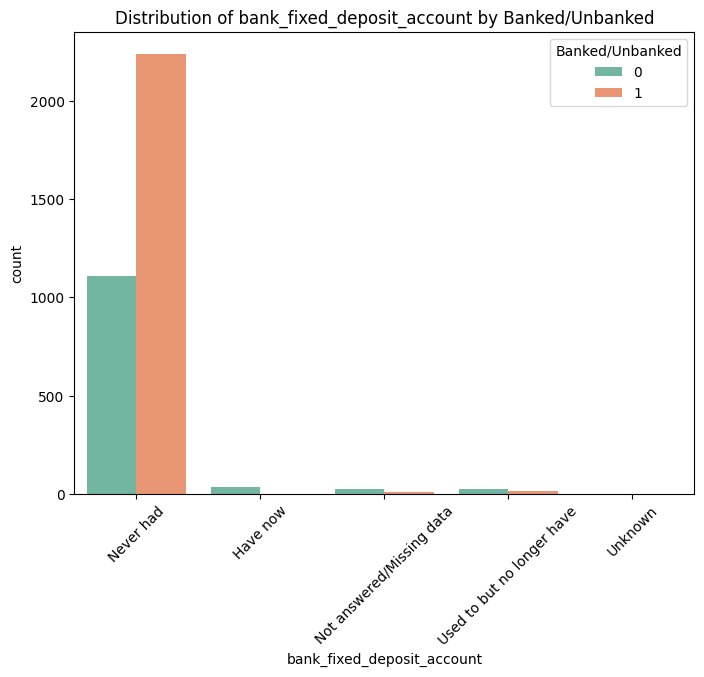

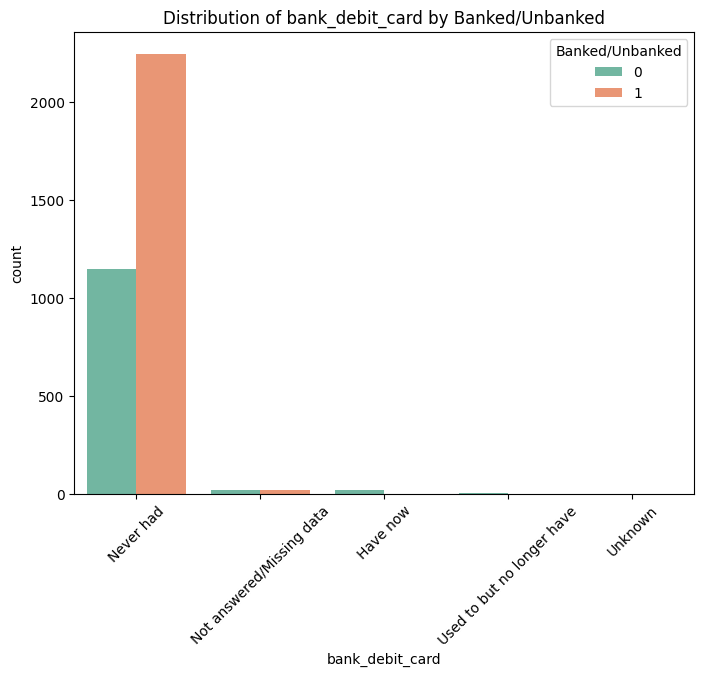

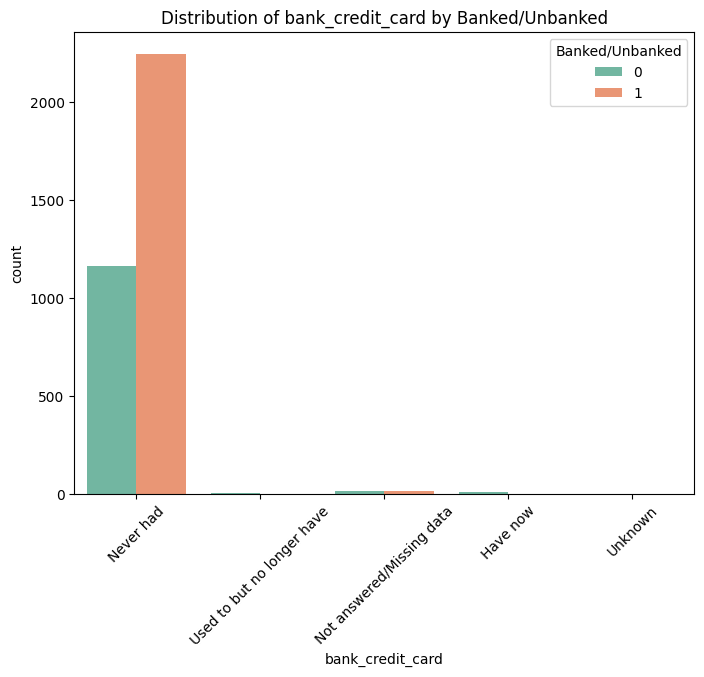

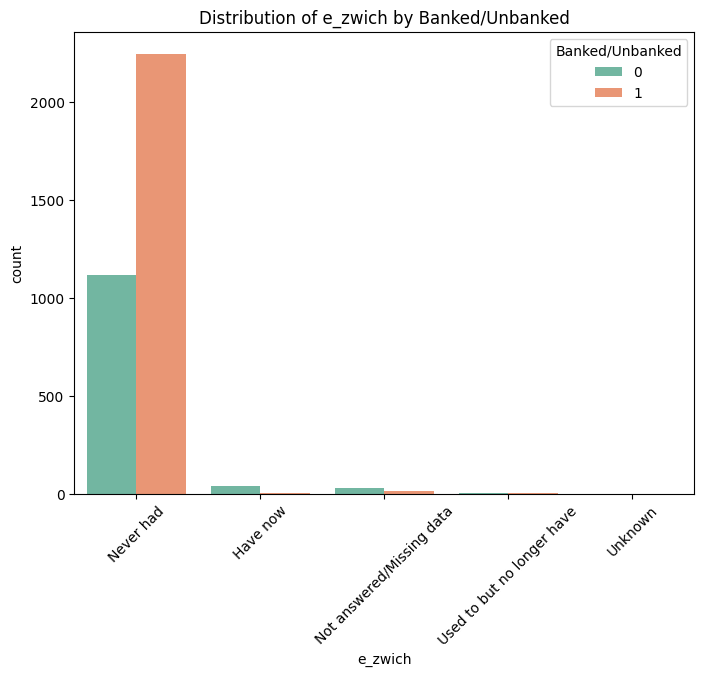

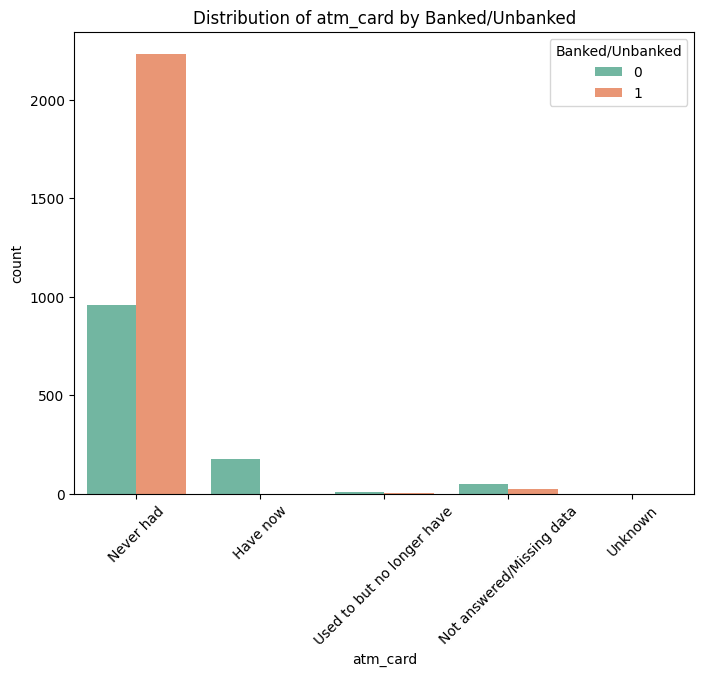

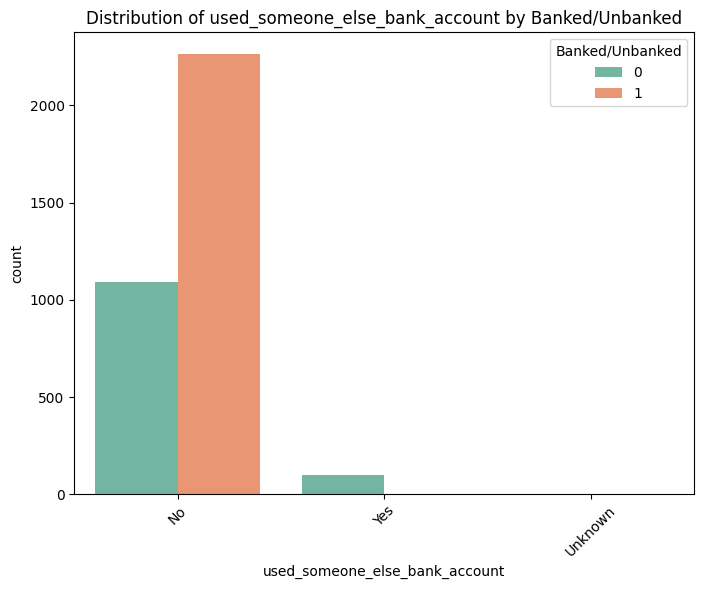

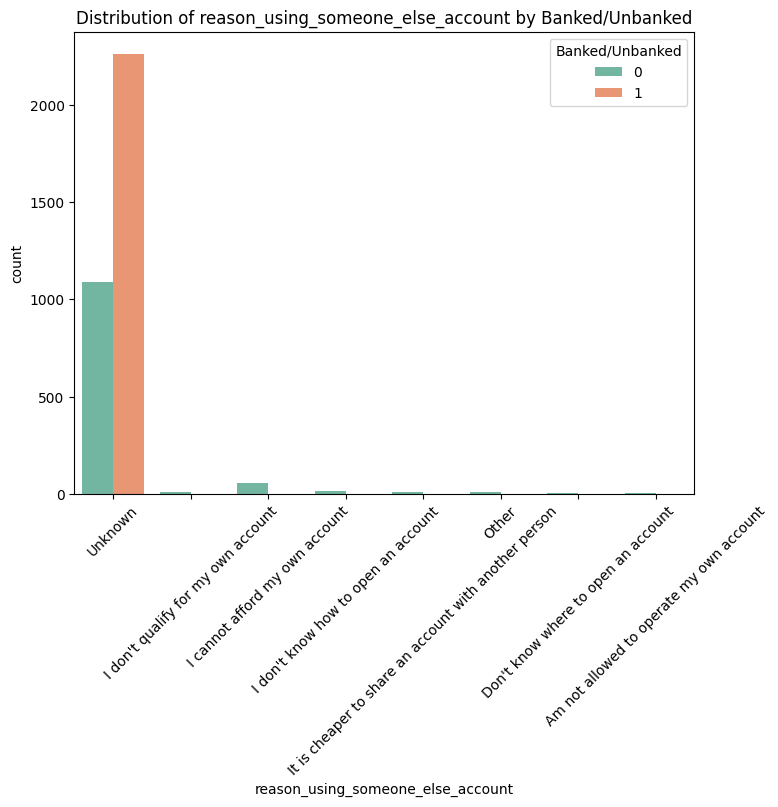

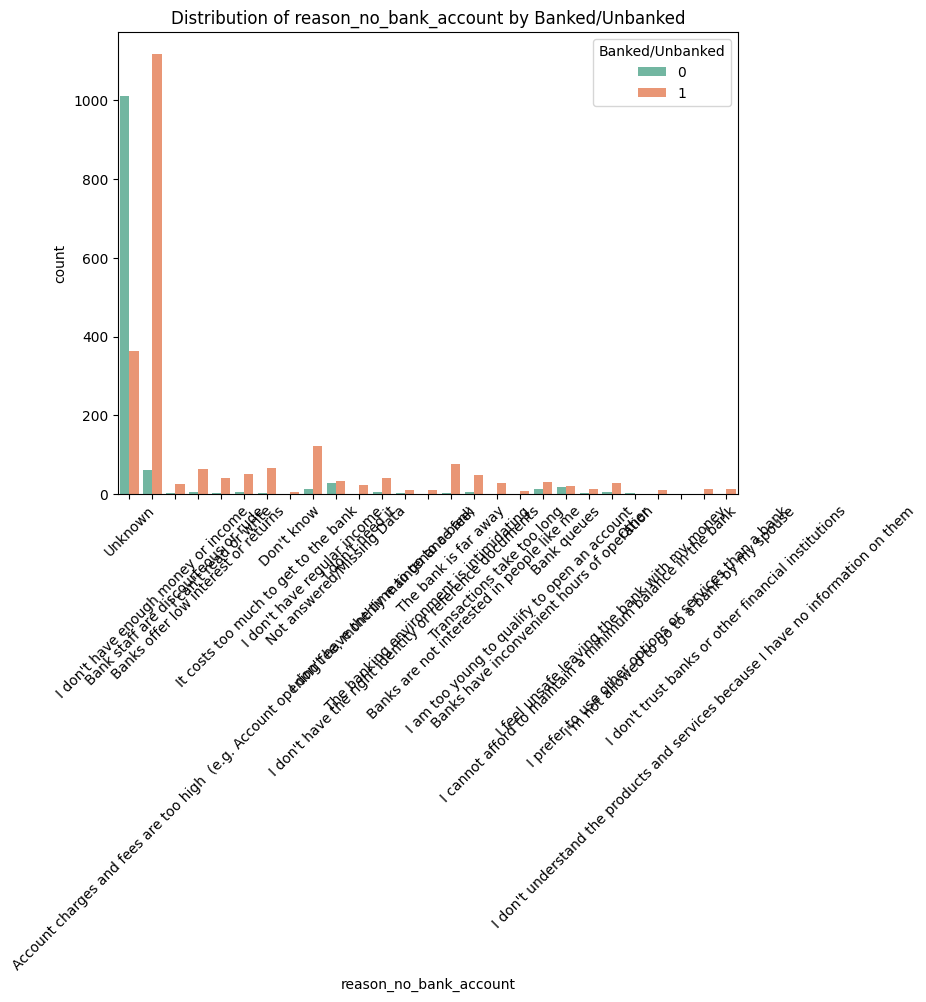

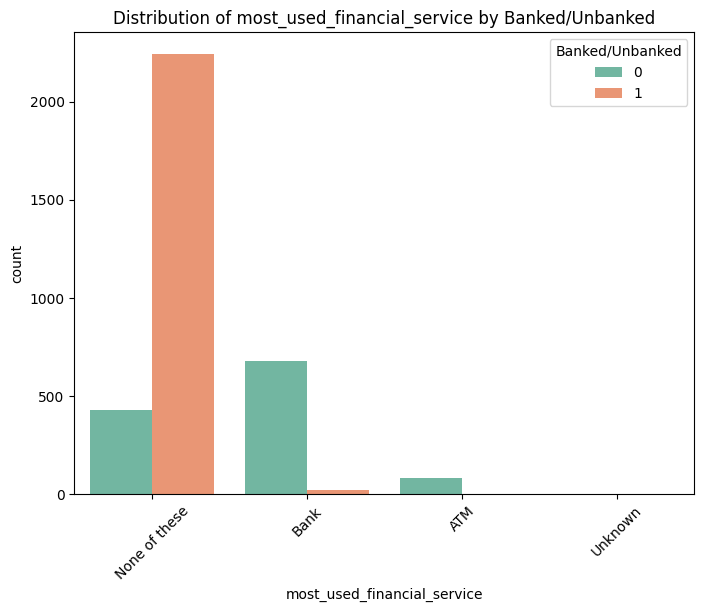

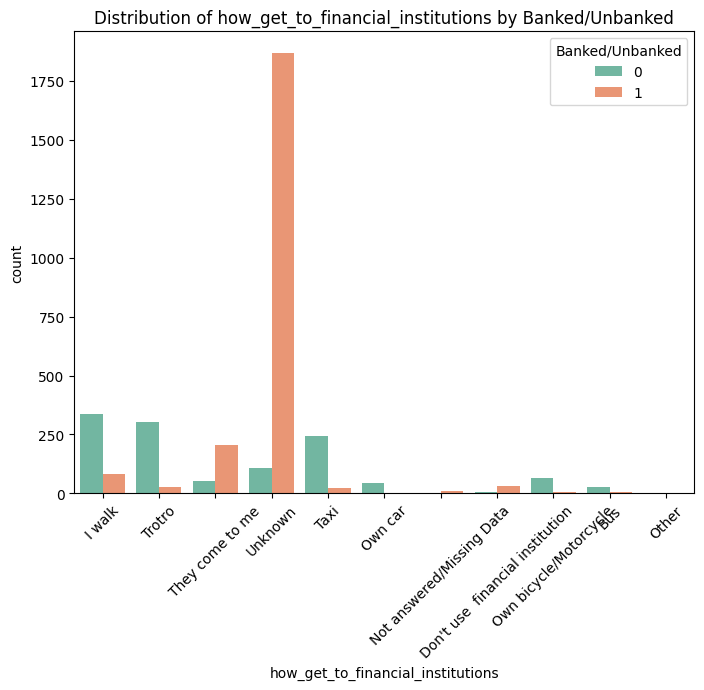

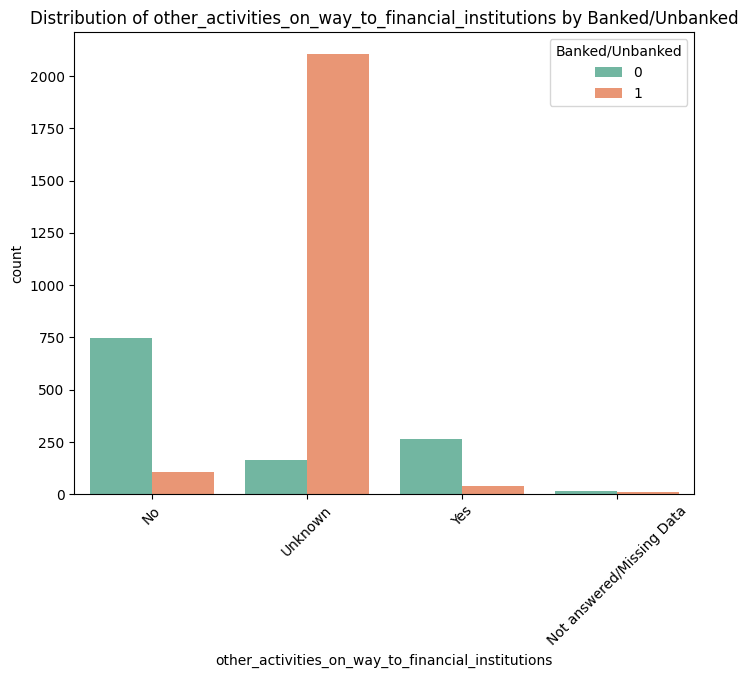

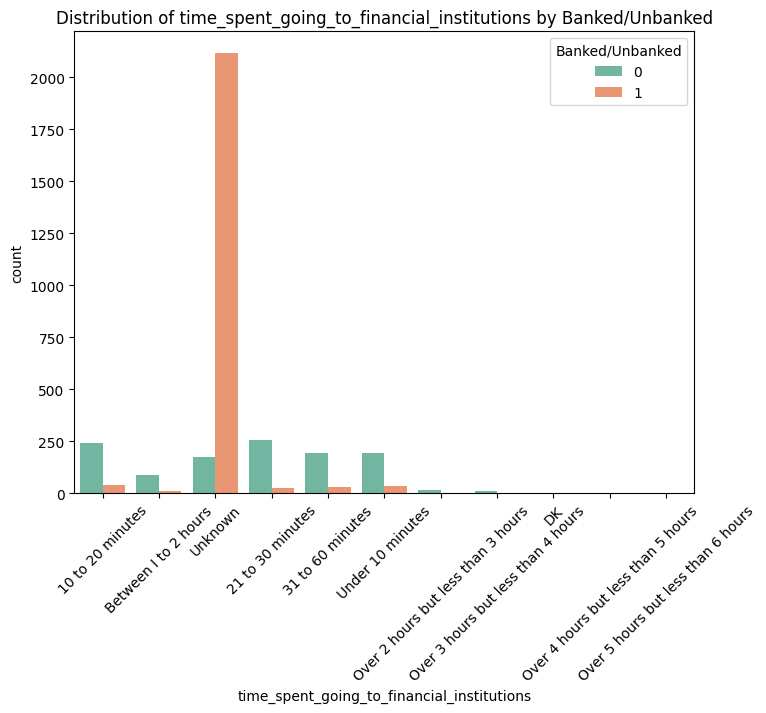

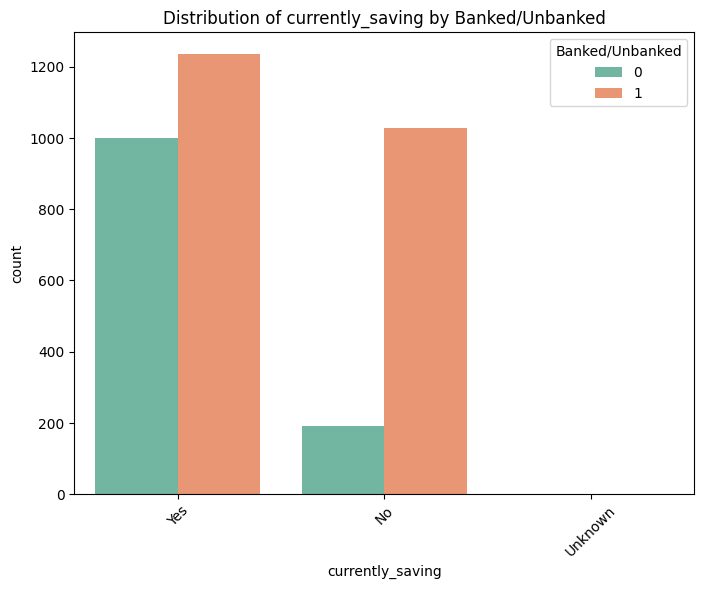

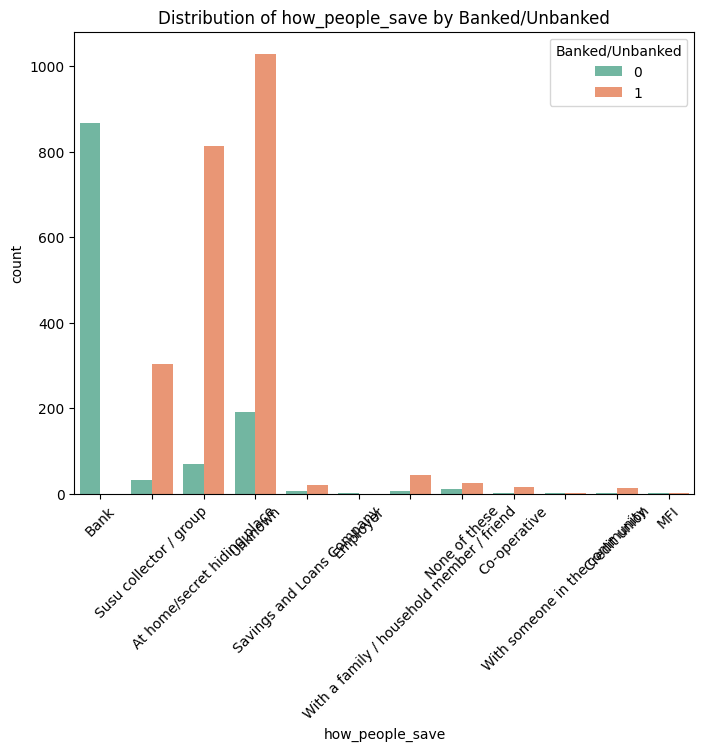

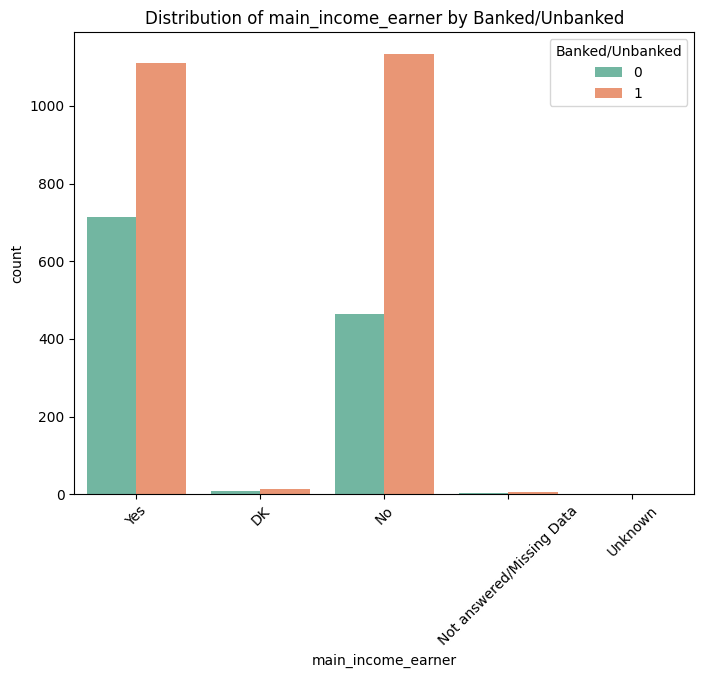

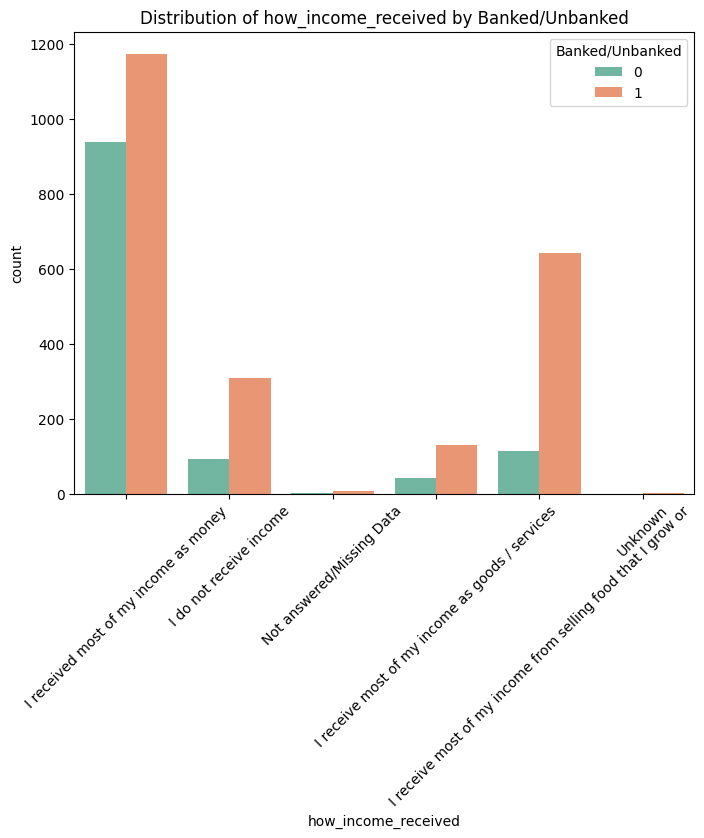

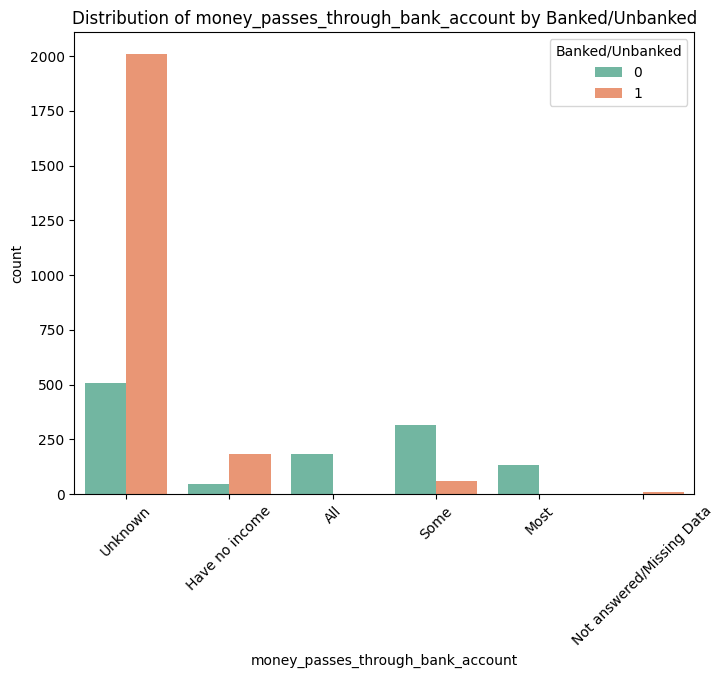

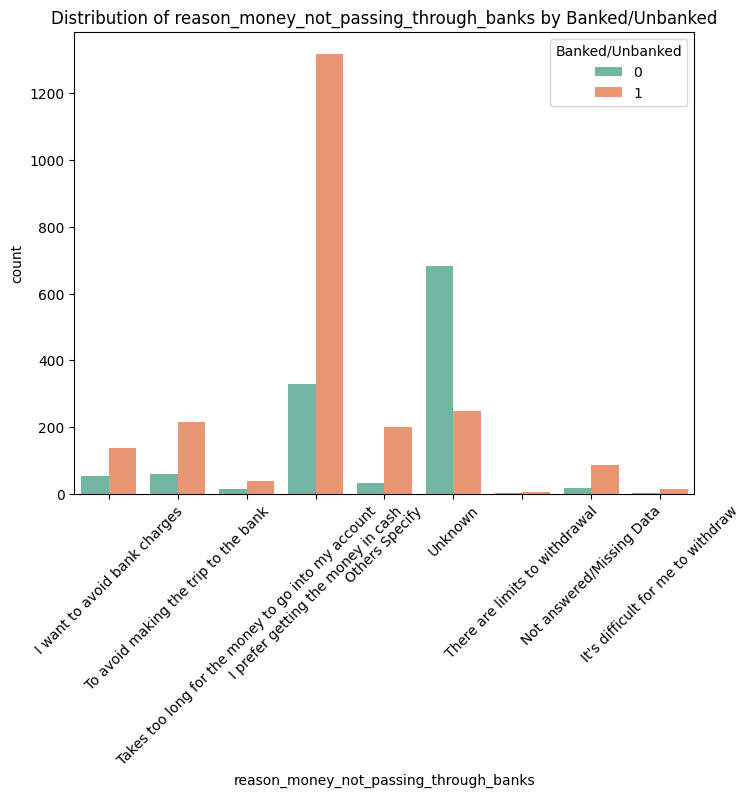

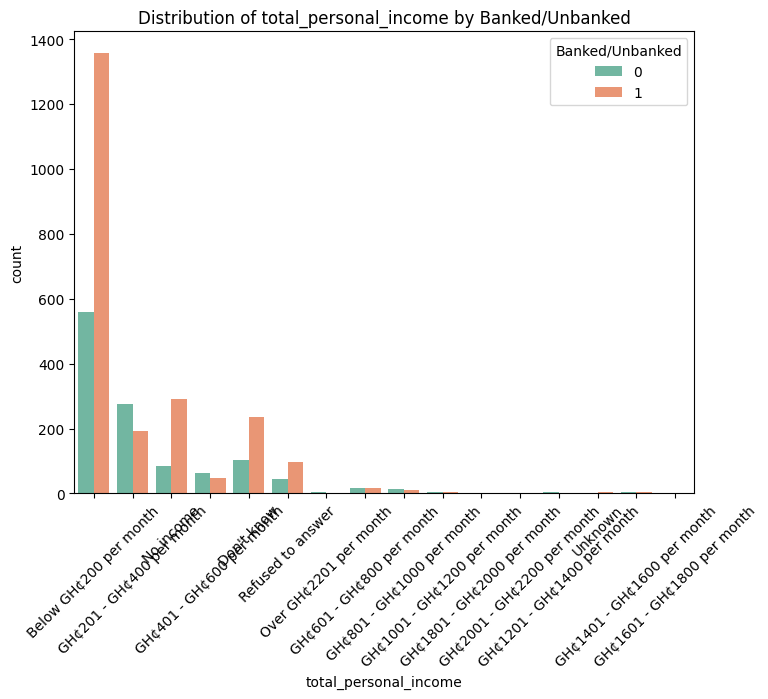

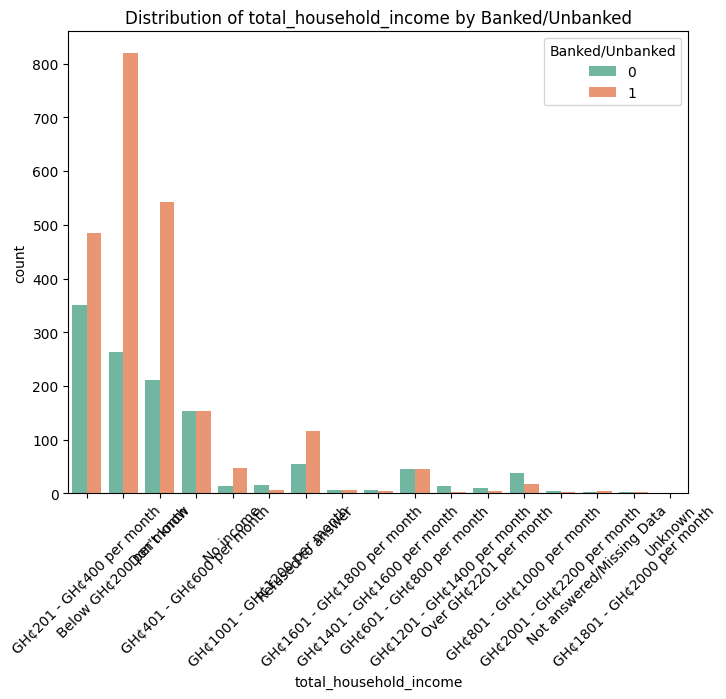

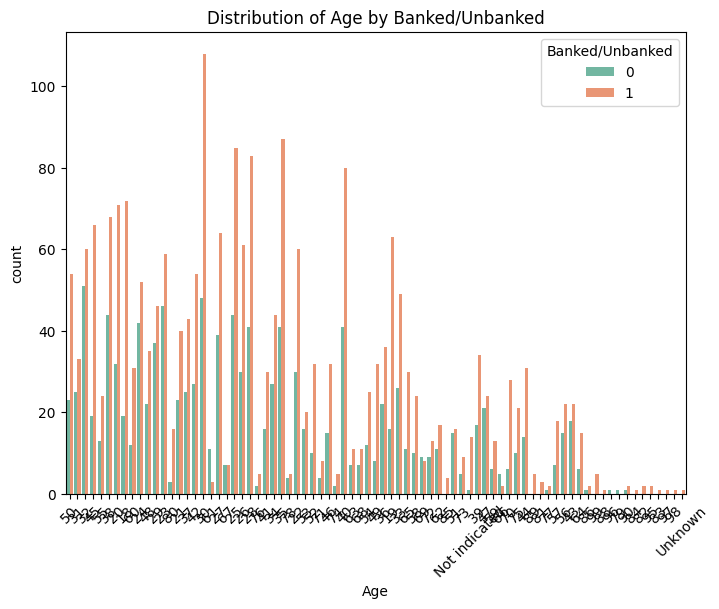

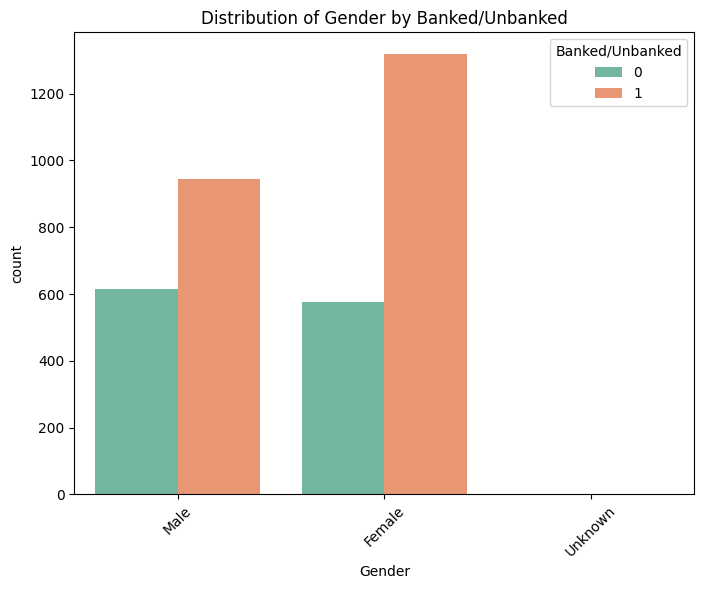

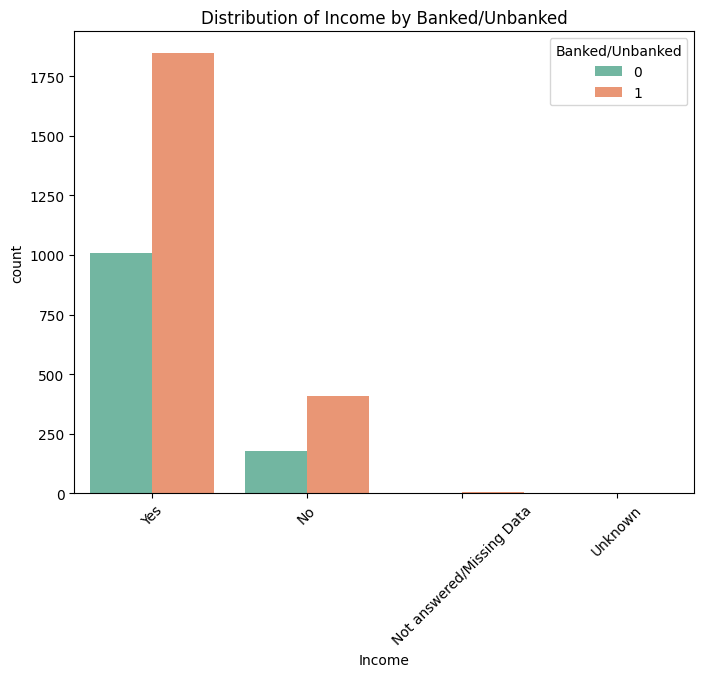

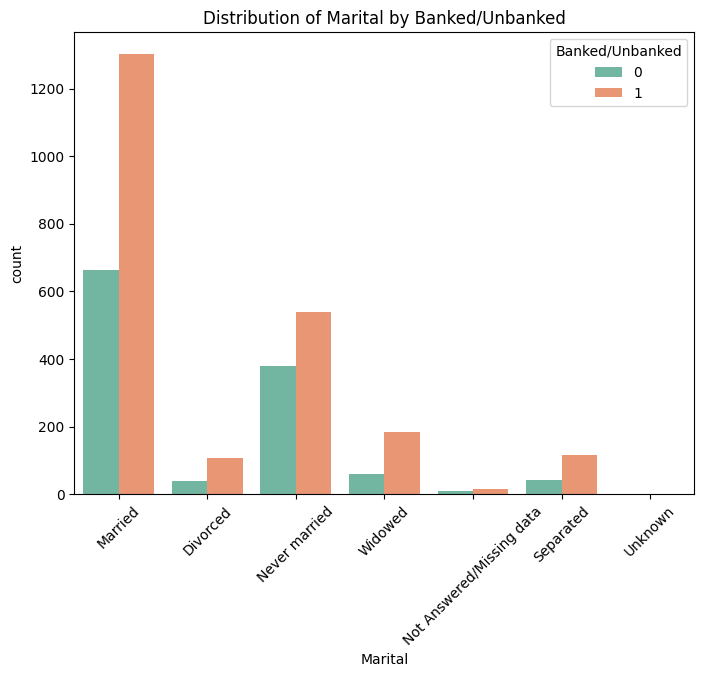

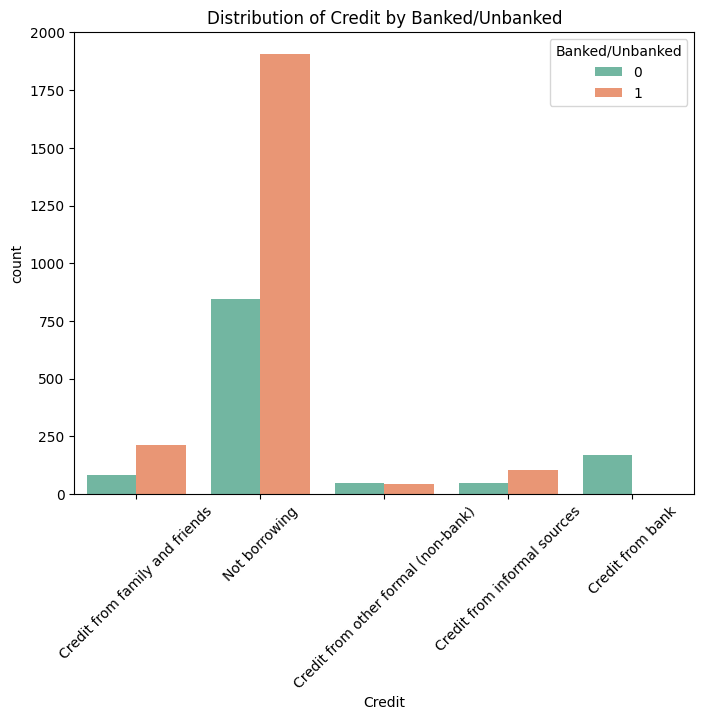

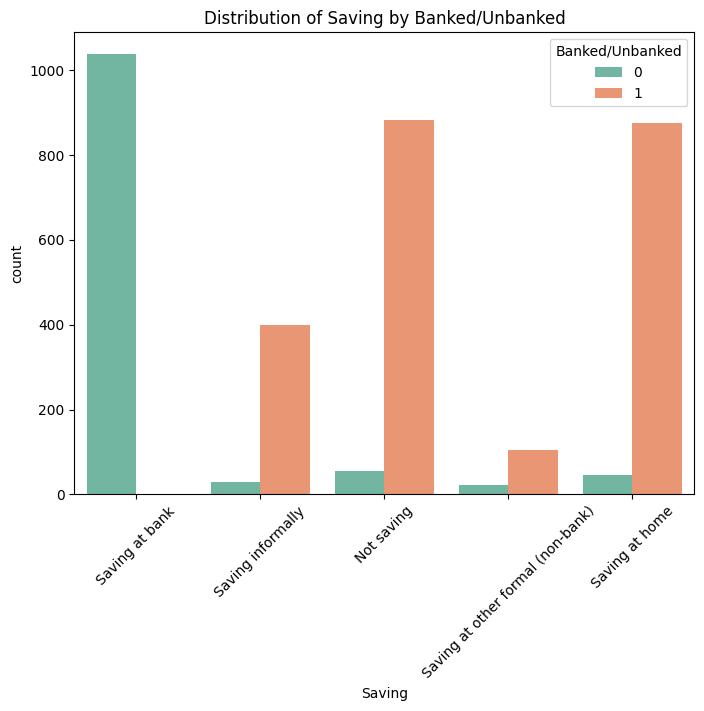

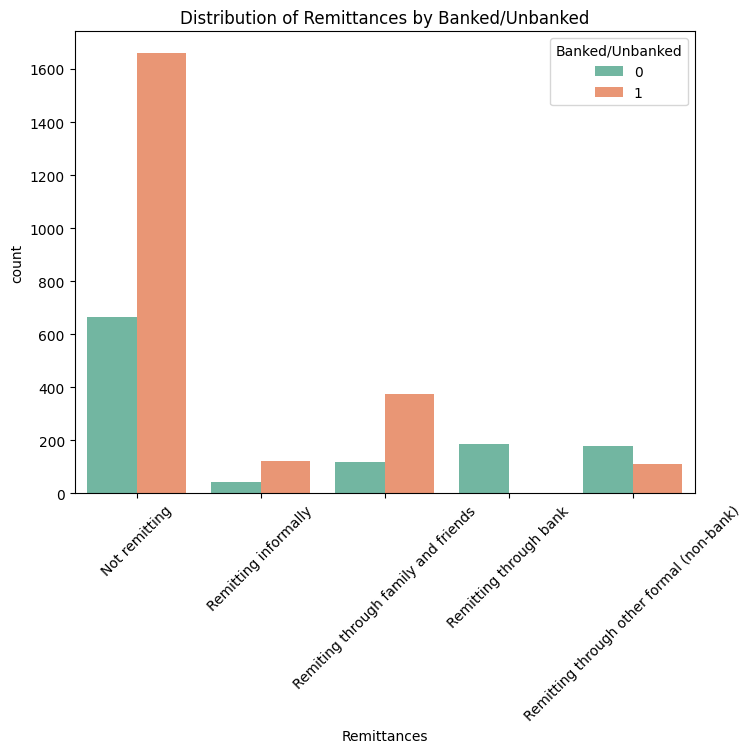

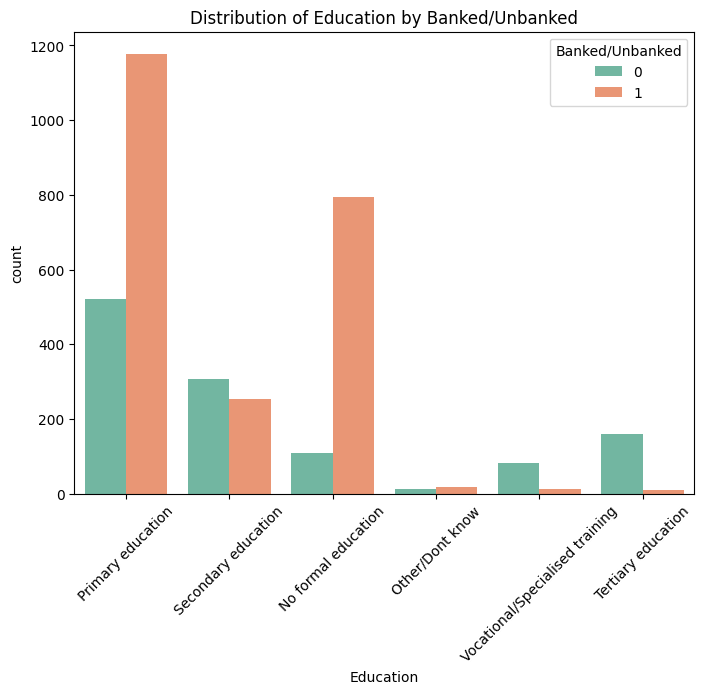

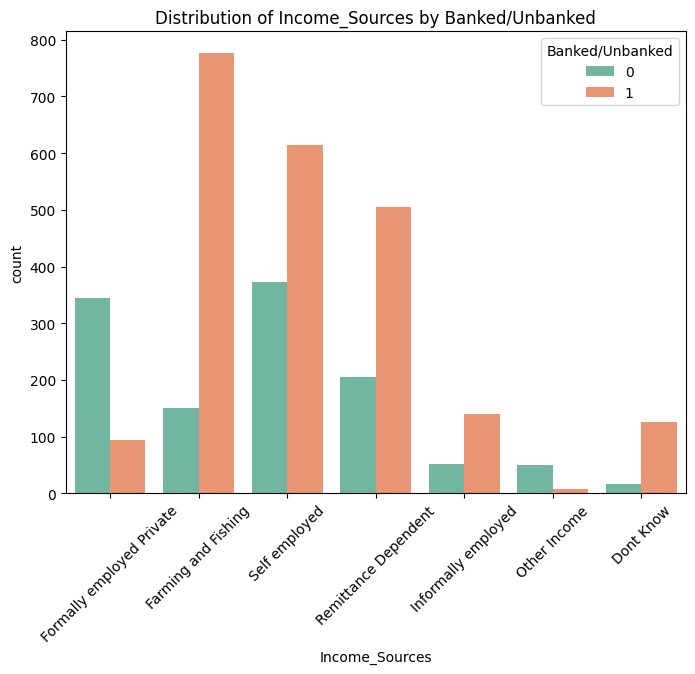

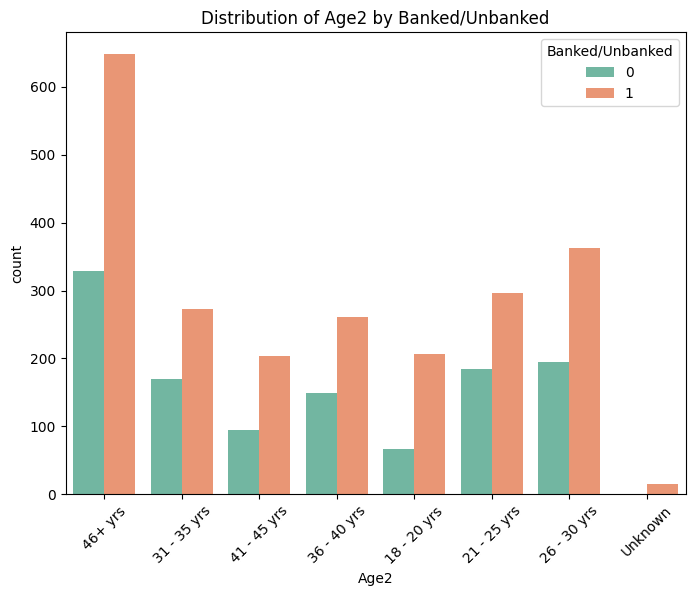

In [17]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

#Categorical distributions specifying the distribution for Banked/Unbanked
for col in categorical_cols:
    if col != 'Banked/Unbanked': 
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col, hue='Banked/Unbanked', palette='Set2')
        plt.title(f"Distribution of {col} by Banked/Unbanked")
        plt.xticks(rotation=45)
        plt.show()

Missing values per column:
ID                                                   0
Weight_Ind                                           0
Region                                               0
Area_type                                            0
Household Number                                     0
how_get_financial_info                               0
involved_financial_decisions                         0
has_money_to_spend                                   0
bank_current_account                                 0
bank_investment_account                              0
bank_savings_account                                 0
bank_fixed_deposit_account                           0
bank_debit_card                                      0
bank_credit_card                                     0
e_zwich                                              0
atm_card                                             0
used_someone_else_bank_account                       0
reason_using_someone_else_account     

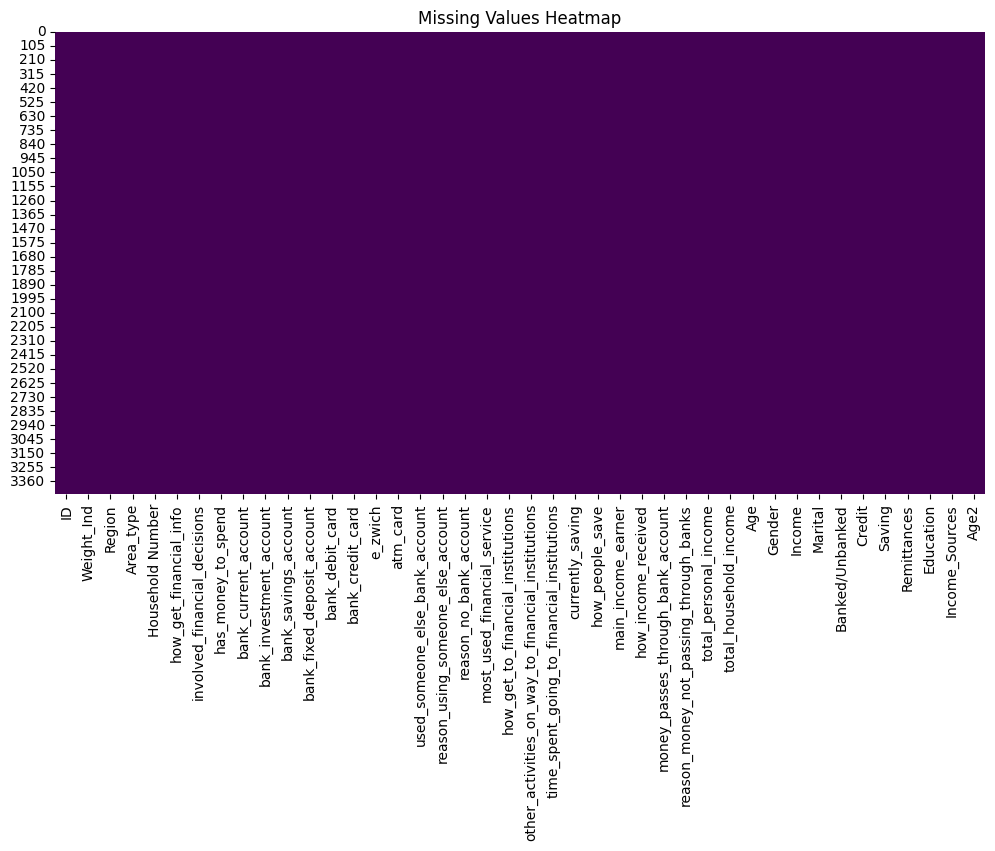

In [18]:
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


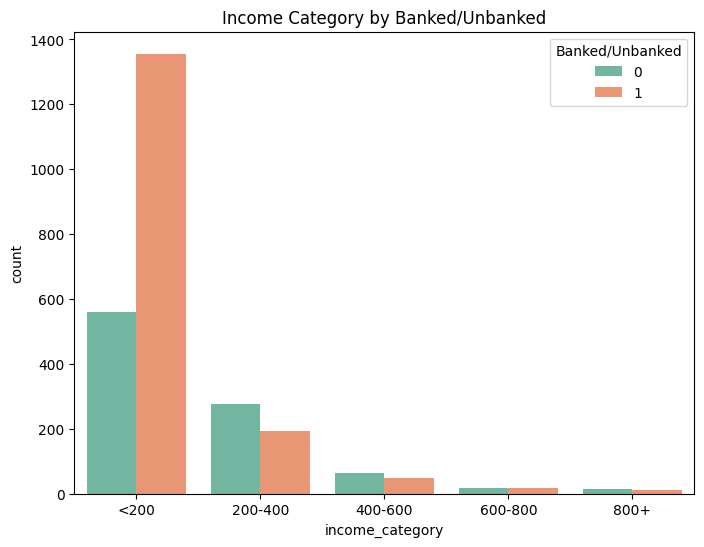

In [19]:
income_mapping = {
    'Below GH¢200 per month': 100,  
    'GH¢201 - GH¢400 per month': 300,  
    'GH¢401 - GH¢600 per month': 500,
    'GH¢601 - GH¢800 per month': 700,
    'GH¢801 - GH¢1000 per month': 900,
    'Above GH¢1000 per month': 1200  
}

df['total_personal_income'] = df['total_personal_income'].map(income_mapping) # mapping column values against income_mapping for visualization

df['income_category'] = pd.cut(
    df['total_personal_income'],
    bins=[0, 200, 400, 600, 800, float('inf')],  # Numeric bins
    labels=['<200', '200-400', '400-600', '600-800', '800+']  # String labels
)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income_category', hue='Banked/Unbanked', palette='Set2')
plt.title("Income Category by Banked/Unbanked")
plt.show()

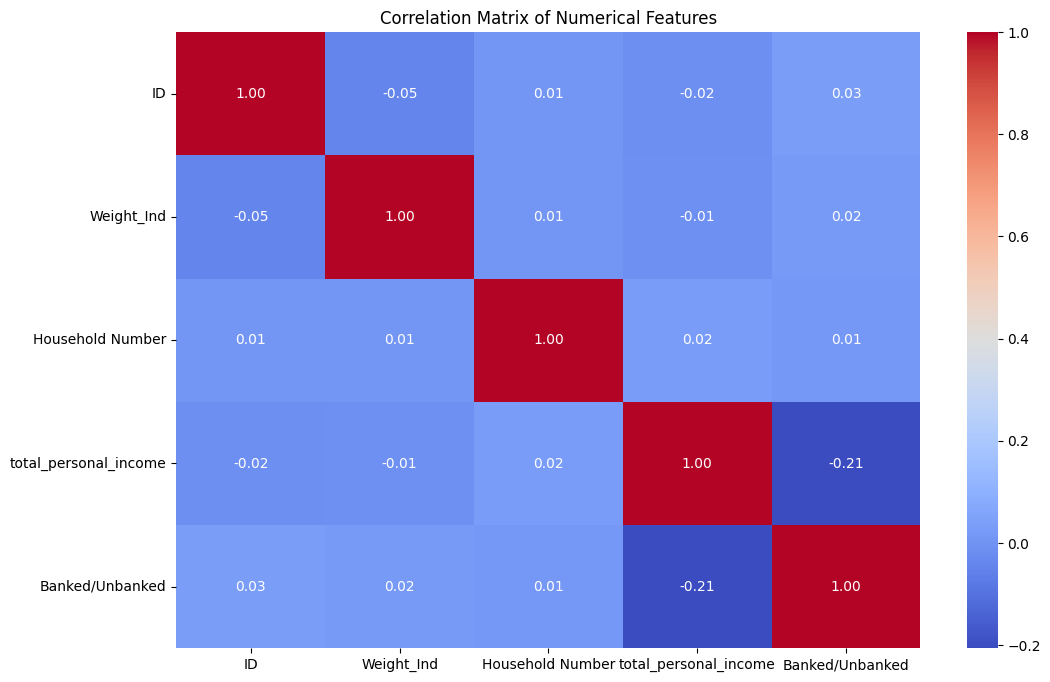

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [21]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

#Crosstab for categorical_cols against banked/unbanked
for col in categorical_cols:
    if col != 'Banked/Unbanked': 
        cross_tab = pd.crosstab(df[col], df['Banked/Unbanked'], normalize='index')
        print(f"Cross-tab for {col}:")
        print(cross_tab)
        print("\n")

Cross-tab for Region:
Banked/Unbanked         0         1
Region                             
Ashanti          0.407813  0.592187
Brong Ahafo      0.273846  0.726154
Central          0.381625  0.618375
Eastern          0.364865  0.635135
Greater Accra    0.483019  0.516981
Northern         0.174312  0.825688
Unknown          0.000000  1.000000
Upper East       0.296482  0.703518
Upper West       0.216049  0.783951
Volta            0.230769  0.769231
Western          0.374622  0.625378


Cross-tab for Area_type:
Banked/Unbanked         0         1
Area_type                          
Rural            0.217632  0.782368
Unknown          0.000000  1.000000
Urban            0.516349  0.483651


Cross-tab for how_get_financial_info:
Banked/Unbanked                                            0         1
how_get_financial_info                                                
Banks or other financial institutions               0.621622  0.378378
Billboards                                        

In [22]:
#Replacing unimportant values with nan
import numpy as np
df['Marital'].replace({'Not Answered/Missing data':np.nan}, inplace=True)

<ipython-input-22-19452e38c0bb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital'].replace({'Not Answered/Missing data':np.nan}, inplace=True)


In [23]:
df['total_personal_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan}, inplace=True)

<ipython-input-23-1259d9fe2587>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_personal_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan}, inplace=True)


In [24]:
df['total_household_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan,
                     'Not answered/Missing Data':np.nan}, inplace=True)

<ipython-input-24-b3ccf34ab2a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_household_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan,


In [25]:
df.total_personal_income.unique()

array([100., 300.,  nan, 500., 700., 900.])

In [26]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number',
       'how_get_financial_info', 'involved_financial_decisions',
       'has_money_to_spend', 'bank_current_account', 'bank_investment_account',
       'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card',
       'used_someone_else_bank_account', 'reason_using_someone_else_account',
       'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions',
       'other_activities_on_way_to_financial_institutions',
       'time_spent_going_to_financial_institutions', 'currently_saving',
       'how_people_save', 'main_income_earner', 'how_income_received',
       'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income',
       'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
  

In [27]:
df.dtypes

ID                                                    float64
Weight_Ind                                            float64
Region                                                 object
Area_type                                              object
Household Number                                      float64
how_get_financial_info                                 object
involved_financial_decisions                           object
has_money_to_spend                                     object
bank_current_account                                   object
bank_investment_account                                object
bank_savings_account                                   object
bank_fixed_deposit_account                             object
bank_debit_card                                        object
bank_credit_card                                       object
e_zwich                                                object
atm_card                                               object
used_som

In [28]:
#Copying useful columns
df = df[['Region','Area_type','Household Number','Age','bank_current_account', 'main_income_earner', 'bank_investment_account', 'bank_debit_card', 'bank_credit_card', 'atm_card', 'most_used_financial_service', 'time_spent_going_to_financial_institutions', 'how_people_save', 'money_passes_through_bank_account',
         'Marital', 'Credit', 'Saving', 'Remittances', 'Education', 'Income_Sources', 'Banked/Unbanked']]

In [29]:
df.head()

,Region,Area_type,Household Number,Age,bank_current_account,main_income_earner,bank_investment_account,bank_debit_card,bank_credit_card,atm_card,...,time_spent_going_to_financial_institutions,how_people_save,money_passes_through_bank_account,Marital,Credit,Saving,Remittances,Education,Income_Sources,Banked/Unbanked
0,Greater Accra,Urban,2.0,50,Never had,Yes,Never had,Never had,Never had,Never had,...,10 to 20 minutes,Bank,Unknown,Married,Credit from family and friends,Saving at bank,Not remitting,Primary education,Formally employed Private,0
1,Greater Accra,Urban,1.0,31,Never had,Yes,Never had,Never had,Never had,Never had,...,Between I to 2 hours,Bank,Unknown,Divorced,Credit from family and friends,Saving at bank,Remitting informally,Primary education,Farming and Fishing,0
2,Greater Accra,Urban,4.0,32,Never had,Yes,Never had,Never had,Never had,Never had,...,Unknown,Susu collector / group,Unknown,Never married,Not borrowing,Saving informally,Not remitting,Secondary education,Self employed,1
3,Greater Accra,Urban,5.0,45,Never had,DK,Never had,Never had,Never had,Never had,...,Unknown,At home/secret hiding place,Unknown,Married,Not borrowing,Saving at bank,Not remitting,No formal education,Self employed,0
4,Greater Accra,Urban,3.0,55,Never had,No,Never had,Never had,Never had,Never had,...,Unknown,Unknown,Unknown,Married,Not borrowing,Saving at bank,Not remitting,Primary education,Self employed,0


In [30]:
df['atm_card'].unique()

array(['Never had', 'Have now', 'Used to but no longer have',
       'Not answered/Missing data', 'Unknown'], dtype=object)

In [31]:
df['bank_debit_card'].unique()

array(['Never had', 'Not answered/Missing data', 'Have now',
       'Used to but no longer have', 'Unknown'], dtype=object)

In [32]:
df['bank_debit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)

<ipython-input-32-42066b2421e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bank_debit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)


In [33]:
df['bank_credit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)
df['bank_debit_card'].unique()


<ipython-input-33-73e16e4070d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bank_credit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)


array(['Never had', nan, 'Have now', 'Used to but no longer have',
       'Unknown'], dtype=object)

In [34]:
df['bank_current_account'].unique()

array(['Never had', 'Have now', 'Not answered/Missing data',
       'Used to but no longer have', 'Unknown'], dtype=object)

In [35]:
df['bank_current_account'].replace({'Not answered/Missing data':np.nan}, inplace=True)

<ipython-input-35-9d0b0e08ee07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bank_current_account'].replace({'Not answered/Missing data':np.nan}, inplace=True)


In [36]:
df['Area_type'].unique()

array(['Urban', 'Rural', 'Unknown'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Region                                      3454 non-null   object 
 1   Area_type                                   3454 non-null   object 
 2   Household Number                            3454 non-null   float64
 3   Age                                         3454 non-null   object 
 4   bank_current_account                        3423 non-null   object 
 5   main_income_earner                          3454 non-null   object 
 6   bank_investment_account                     3454 non-null   object 
 7   bank_debit_card                             3415 non-null   object 
 8   bank_credit_card                            3423 non-null   object 
 9   atm_card                                    3454 non-null   object 
 10  most_used_fi

In [38]:
df.isna().sum()

Region                                         0
Area_type                                      0
Household Number                               0
Age                                            0
bank_current_account                          31
main_income_earner                             0
bank_investment_account                        0
bank_debit_card                               39
bank_credit_card                              31
atm_card                                       0
most_used_financial_service                    0
time_spent_going_to_financial_institutions     0
how_people_save                                0
money_passes_through_bank_account              0
Marital                                       24
Credit                                         0
Saving                                         0
Remittances                                    0
Education                                      0
Income_Sources                                 0
Banked/Unbanked     

In [39]:
#Replacing unimportant features across categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[categorical_cols] = df[categorical_cols].replace('Not indicated', np.nan)

print("Number of NaNs in each column after replacement:")
print(df[categorical_cols].isnull().sum())

Number of NaNs in each column after replacement:
Region                                         0
Area_type                                      0
Age                                           15
bank_current_account                          31
main_income_earner                             0
bank_investment_account                        0
bank_debit_card                               39
bank_credit_card                              31
atm_card                                       0
most_used_financial_service                    0
time_spent_going_to_financial_institutions     0
how_people_save                                0
money_passes_through_bank_account              0
Marital                                       24
Credit                                         0
Saving                                         0
Remittances                                    0
Education                                      0
Income_Sources                                 0
dtype: int64


In [40]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[categorical_cols] = df[categorical_cols].replace('Not answered/Missing data', np.nan)

print("Number of NaNs in each column after replacement:")
print(df[categorical_cols].isnull().sum())

Number of NaNs in each column after replacement:
Region                                         0
Area_type                                      0
Age                                           15
bank_current_account                          31
main_income_earner                             0
bank_investment_account                       21
bank_debit_card                               39
bank_credit_card                              31
atm_card                                      74
most_used_financial_service                    0
time_spent_going_to_financial_institutions     0
how_people_save                                0
money_passes_through_bank_account              0
Marital                                       24
Credit                                         0
Saving                                         0
Remittances                                    0
Education                                      0
Income_Sources                                 0
dtype: int64


In [41]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[categorical_cols] = df[categorical_cols].replace('Unknown', np.nan)

print("Number of NaNs in each column after replacement:")
print(df[categorical_cols].isnull().sum())

Number of NaNs in each column after replacement:
Region                                           1
Area_type                                        1
Age                                             16
bank_current_account                            32
main_income_earner                               1
bank_investment_account                         22
bank_debit_card                                 40
bank_credit_card                                32
atm_card                                        75
most_used_financial_service                      1
time_spent_going_to_financial_institutions    2288
how_people_save                               1220
money_passes_through_bank_account             2515
Marital                                         25
Credit                                           0
Saving                                           0
Remittances                                      0
Education                                        0
Income_Sources                   

In [42]:
df.columns

Index(['Region', 'Area_type', 'Household Number', 'Age',
       'bank_current_account', 'main_income_earner', 'bank_investment_account',
       'bank_debit_card', 'bank_credit_card', 'atm_card',
       'most_used_financial_service',
       'time_spent_going_to_financial_institutions', 'how_people_save',
       'money_passes_through_bank_account', 'Marital', 'Credit', 'Saving',
       'Remittances', 'Education', 'Income_Sources', 'Banked/Unbanked'],
      dtype='object')

<Axes: >

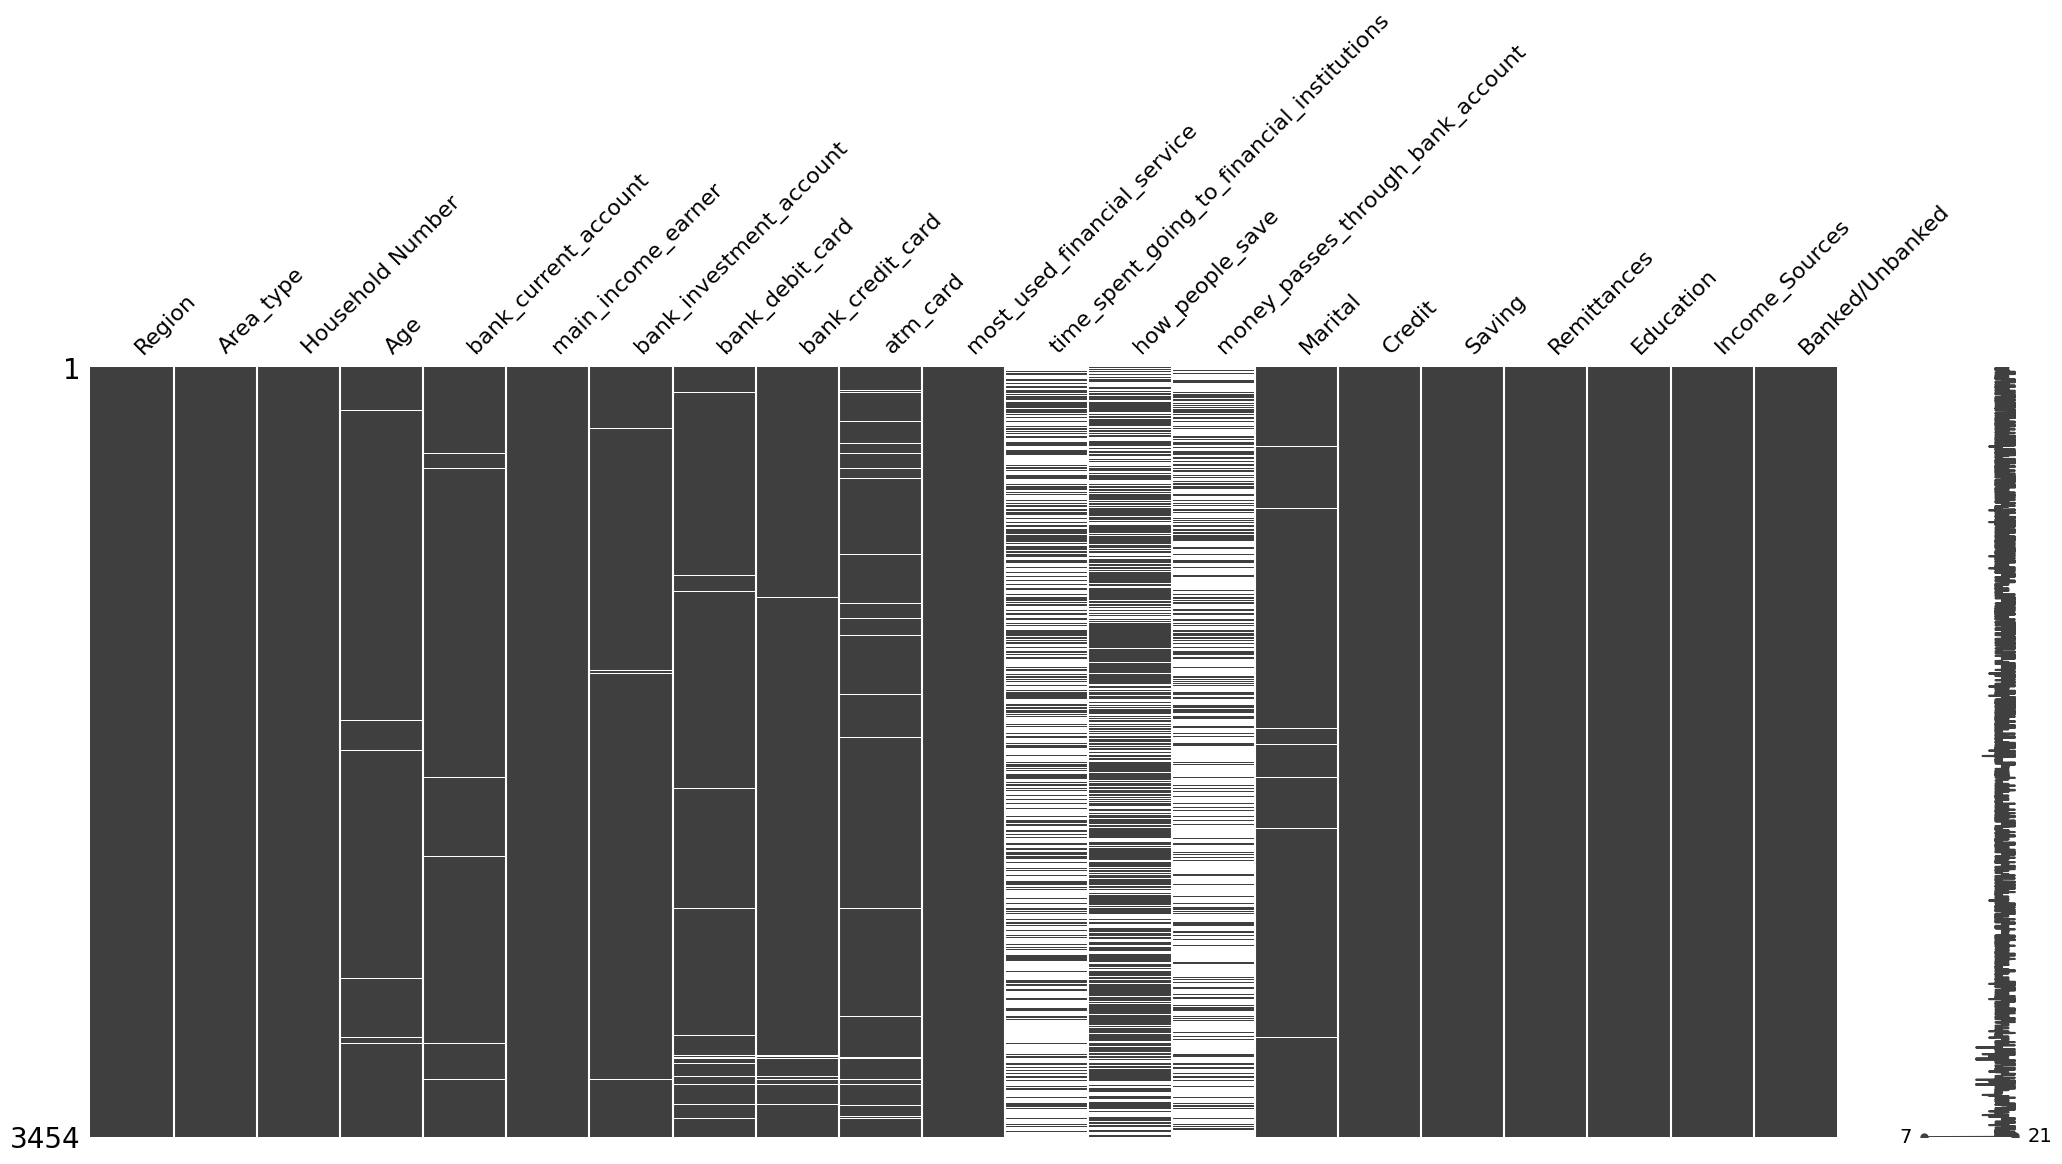

In [43]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [44]:
df.drop(columns=['time_spent_going_to_financial_institutions', 'how_people_save', 'money_passes_through_bank_account'], inplace= True)

In [45]:
#Drop missing rows
df.dropna(inplace=True) 


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3286 entries, 0 to 3452
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       3286 non-null   object 
 1   Area_type                    3286 non-null   object 
 2   Household Number             3286 non-null   float64
 3   Age                          3286 non-null   object 
 4   bank_current_account         3286 non-null   object 
 5   main_income_earner           3286 non-null   object 
 6   bank_investment_account      3286 non-null   object 
 7   bank_debit_card              3286 non-null   object 
 8   bank_credit_card             3286 non-null   object 
 9   atm_card                     3286 non-null   object 
 10  most_used_financial_service  3286 non-null   object 
 11  Marital                      3286 non-null   object 
 12  Credit                       3286 non-null   object 
 13  Saving                 

In [47]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    if col != 'Banked/Unbanked': 
        cross_tab = pd.crosstab(df[col], df['Banked/Unbanked'], normalize='index')
        print(f"Cross-tab for {col}:")
        print(cross_tab)
        print("\n")

Cross-tab for Region:
Banked/Unbanked         0         1
Region                             
Ashanti          0.403909  0.596091
Brong Ahafo      0.270186  0.729814
Central          0.366300  0.633700
Eastern          0.360882  0.639118
Greater Accra    0.456566  0.543434
Northern         0.162866  0.837134
Upper East       0.267857  0.732143
Upper West       0.206667  0.793333
Volta            0.219858  0.780142
Western          0.355769  0.644231


Cross-tab for Area_type:
Banked/Unbanked         0         1
Area_type                          
Rural            0.208814  0.791186
Urban            0.502174  0.497826


Cross-tab for Age:
Banked/Unbanked         0         1
Age                                
18               0.213483  0.786517
19               0.189189  0.810811
20               0.281250  0.718750
21               0.368421  0.631579
22               0.325843  0.674157
..                    ...       ...
95               0.000000  1.000000
96               1.000000  0.0

In [48]:
df.columns

Index(['Region', 'Area_type', 'Household Number', 'Age',
       'bank_current_account', 'main_income_earner', 'bank_investment_account',
       'bank_debit_card', 'bank_credit_card', 'atm_card',
       'most_used_financial_service', 'Marital', 'Credit', 'Saving',
       'Remittances', 'Education', 'Income_Sources', 'Banked/Unbanked'],
      dtype='object')

In [49]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Region_N'] = labelencoder.fit_transform(df['Region'])
df['Area_type_N'] = labelencoder.fit_transform(df['Area_type'])
df['Bank_DC_N'] = labelencoder.fit_transform(df['bank_debit_card'])
df['Bank_CC_N'] = labelencoder.fit_transform(df['bank_credit_card'])
df['atm_card_N'] = labelencoder.fit_transform(df['atm_card'])
df['Most_used_fs_N'] = labelencoder.fit_transform(df['most_used_financial_service'])
df['Marital_N'] = labelencoder.fit_transform(df['Marital'])
df['Credit_N'] = labelencoder.fit_transform(df['Credit'])
df['Saving_N'] = labelencoder.fit_transform(df['Saving'])
df['Remittances_N'] = labelencoder.fit_transform(df['Remittances'])
df['Education_N'] = labelencoder.fit_transform(df['Education'])
df['Income_sources_N'] = labelencoder.fit_transform(df['Income_Sources'])

In [50]:
df.head()

,Region,Area_type,Household Number,Age,bank_current_account,main_income_earner,bank_investment_account,bank_debit_card,bank_credit_card,atm_card,...,Bank_DC_N,Bank_CC_N,atm_card_N,Most_used_fs_N,Marital_N,Credit_N,Saving_N,Remittances_N,Education_N,Income_sources_N
0,Greater Accra,Urban,2.0,50,Never had,Yes,Never had,Never had,Never had,Never had,...,1,1,1,2,1,1,1,0,2,2
1,Greater Accra,Urban,1.0,31,Never had,Yes,Never had,Never had,Never had,Never had,...,1,1,1,2,0,1,1,2,2,1
2,Greater Accra,Urban,4.0,32,Never had,Yes,Never had,Never had,Never had,Never had,...,1,1,1,2,2,4,4,0,3,6
3,Greater Accra,Urban,5.0,45,Never had,DK,Never had,Never had,Never had,Never had,...,1,1,1,2,1,4,1,0,0,6
4,Greater Accra,Urban,3.0,55,Never had,No,Never had,Never had,Never had,Never had,...,1,1,1,2,1,4,1,0,2,6


In [51]:
#Converting Age to an integer
df['Age'] = df['Age'].astype('int64')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3286 entries, 0 to 3452
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       3286 non-null   object 
 1   Area_type                    3286 non-null   object 
 2   Household Number             3286 non-null   float64
 3   Age                          3286 non-null   int64  
 4   bank_current_account         3286 non-null   object 
 5   main_income_earner           3286 non-null   object 
 6   bank_investment_account      3286 non-null   object 
 7   bank_debit_card              3286 non-null   object 
 8   bank_credit_card             3286 non-null   object 
 9   atm_card                     3286 non-null   object 
 10  most_used_financial_service  3286 non-null   object 
 11  Marital                      3286 non-null   object 
 12  Credit                       3286 non-null   object 
 13  Saving                 

In [53]:
#Drop categorical values
df = df.drop(columns=['Region','Area_type','bank_current_account', 'main_income_earner', 'bank_investment_account', 'bank_debit_card', 'bank_credit_card', 'atm_card', 'most_used_financial_service', 'Marital', 'Credit', 'Saving', 'Remittances', 'Education', 'Income_Sources'])

In [54]:
df.columns

Index(['Household Number', 'Age', 'Banked/Unbanked', 'Region_N', 'Area_type_N',
       'Bank_DC_N', 'Bank_CC_N', 'atm_card_N', 'Most_used_fs_N', 'Marital_N',
       'Credit_N', 'Saving_N', 'Remittances_N', 'Education_N',
       'Income_sources_N'],
      dtype='object')

In [55]:
#Split data and give importance to the y variable
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Banked/Unbanked'])  
y = df['Banked/Unbanked']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
#Using chiSquared to determine feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(13,'Score'))  

               Specs       Score
11     Remittances_N  596.258375
12       Education_N  448.737923
7     Most_used_fs_N  191.336235
3        Area_type_N  180.163304
10          Saving_N  126.874903
9           Credit_N   56.801938
2           Region_N   47.800247
13  Income_sources_N   35.853774
6         atm_card_N   16.232257
1                Age    2.832313
8          Marital_N    0.826384
0   Household Number    0.483345
4          Bank_DC_N    0.103884


[0.03027139 0.04810272 0.0312883  0.04092179 0.00181994 0.00061758
 0.02544695 0.2762363  0.01962184 0.04273083 0.35270705 0.04436736
 0.05279475 0.0330732 ]


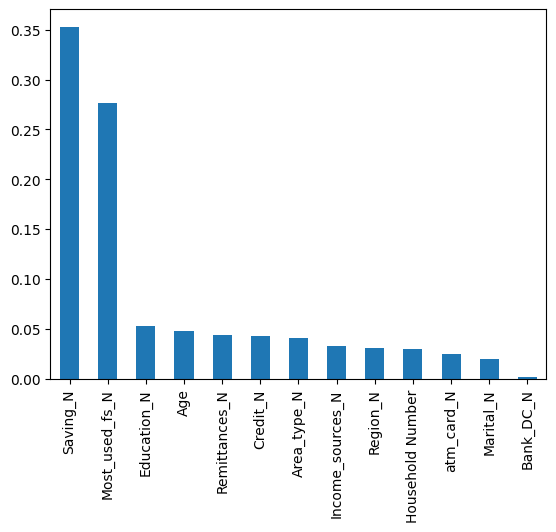

In [57]:
#Using Ensemble model to determine feature importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='bar')
plt.show()

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


pipeline = Pipeline([
    ('scaler', StandardScaler()), #Scale columns
    ('logreg', LogisticRegression(
        class_weight='balanced', 
        penalty='l2',
        C=0.1,
        random_state=42,
        max_iter=1000
    ))
])

pipeline.fit(X_train, y_train)

y_pred_logreg = pipeline.predict(X_test)
y_proba_logreg = pipeline.predict_proba(X_test)[:, 1]

print('Logistic Regression Report:')
print(classification_report(y_test, y_pred_logreg))
print('ROC-AUC score: ', roc_auc_score(y_test, y_proba_logreg))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['logreg'].coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       218
           1       0.90      0.92      0.91       440

    accuracy                           0.88       658
   macro avg       0.86      0.85      0.86       658
weighted avg       0.88      0.88      0.88       658

ROC-AUC score:  0.927835696413678
             Feature  Coefficient
7     Most_used_fs_N     1.922376
9           Credit_N     0.374893
6         atm_card_N     0.364763
10          Saving_N     0.344813
4          Bank_DC_N     0.187490
2           Region_N     0.129726
8          Marital_N     0.041216
5          Bank_CC_N    -0.042025
0   Household Number    -0.048671
1                Age    -0.196295
13  Income_sources_N    -0.208793
11     Remittances_N    -0.259244
3        Area_type_N    -0.372627
12       Education_N    -0.606864


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

base_estimator = DecisionTreeClassifier(max_depth=2)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=200,
        learning_rate=1.5,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

y_pred= pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print('AdaBoost Classifier Report:')
print(classification_report(y_test, y_pred))
print('ROC-AUC score: ', roc_auc_score(y_test, y_proba))



AdaBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       218
           1       0.95      0.97      0.96       440

    accuracy                           0.95       658
   macro avg       0.94      0.94      0.94       658
weighted avg       0.95      0.95      0.95       658

ROC-AUC score:  0.9588198498748959


In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from torch.optim import AdamW

In [61]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [62]:
class CreditworthinessNet(nn.Module):
    def __init__(self, input_dim):
        super(CreditworthinessNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        #print("Input shape:", x.shape)
        x = self.relu(self.fc1(x))
        #print("After fc1:", x.shape)
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        #print("After fc2:", x.shape)
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        #print("Output shape:", x.shape)
        return x

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #To use GPU
print(f"Using device: {device}")
input_dim = X_train.shape[1]

model = CreditworthinessNet(input_dim).to(device)
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)


criterion = nn.BCELoss(weight=class_weights[1] if y_train_tensor.squeeze().sum() > 0 else None)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

def train_model(model, criterion, optimizer, train_loader, epochs = 50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device) #To move to GPU
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        if (epoch +1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

train_model(model, criterion, optimizer, train_loader, epochs= 100)


Using device: cuda
Epoch [10/100], Loss: 0.3704
Epoch [20/100], Loss: 0.2971
Epoch [30/100], Loss: 0.2452
Epoch [40/100], Loss: 0.2075
Epoch [50/100], Loss: 0.1954
Epoch [60/100], Loss: 0.1811
Epoch [70/100], Loss: 0.1510
Epoch [80/100], Loss: 0.1331
Epoch [90/100], Loss: 0.1363
Epoch [100/100], Loss: 0.1242


In [64]:
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred_prob = [], []
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            y_pred_prob.extend(outputs.cpu().numpy().flatten())
            y_true.extend(batch_y.cpu().numpy().flatten())

    y_pred = (np.array(y_pred_prob) > 0.5).astype(int)

    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('ROC-AUC Score: ', roc_auc_score(y_true, y_pred_prob))

evaluate_model(model, test_loader)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       218
         1.0       0.95      1.00      0.97       440

    accuracy                           0.96       658
   macro avg       0.97      0.94      0.96       658
weighted avg       0.96      0.96      0.96       658

ROC-AUC Score:  0.9758027522935779


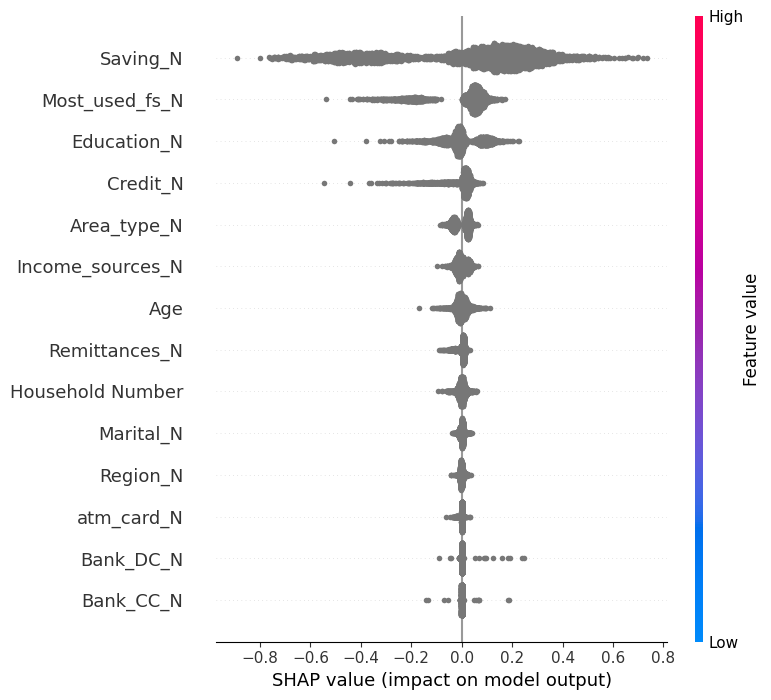

In [65]:
import shap

model = model.to('cuda')

X_train_tensor = X_train_tensor.to('cuda')

explainer = shap.GradientExplainer(model, X_train_tensor)

shap_values = explainer.shap_values(X_train_tensor) 

shap.summary_plot(shap_values, X_train_tensor, feature_names=X_train.columns) #ploting how model arrived at decision, key features that the model uses

In [66]:
import pandas as pd

data = {
    "Metric": [
        "Accuracy",
        "Precision (0)",
        "Recall (0)",
        "F1-Score (0)",
        "Precision (1)",
        "Recall (1)",
        "F1-Score (1)",
        "ROC-AUC Score",
    ],
    "Logistic Regression": ["88%", 0.83, 0.79, 0.81, 0.90, 0.92, 0.91, 0.928],
    "AdaBoost Classifier": ["95%", 0.93, 0.90, 0.92, 0.95, 0.97, 0.96, 0.959],
    "RNN": ["96%", 0.98, 0.89, 0.94, 0.95, 0.99, 0.97, "Likely > 0.95"],
}

df_comparison = pd.DataFrame(data)
display(df_comparison)

,Metric,Logistic Regression,AdaBoost Classifier,RNN
0,Accuracy,88%,95%,96%
1,Precision (0),0.83,0.93,0.98
2,Recall (0),0.79,0.9,0.89
3,F1-Score (0),0.81,0.92,0.94
4,Precision (1),0.9,0.95,0.95
5,Recall (1),0.92,0.97,0.99
6,F1-Score (1),0.91,0.96,0.97
7,ROC-AUC Score,0.928,0.959,Likely > 0.95


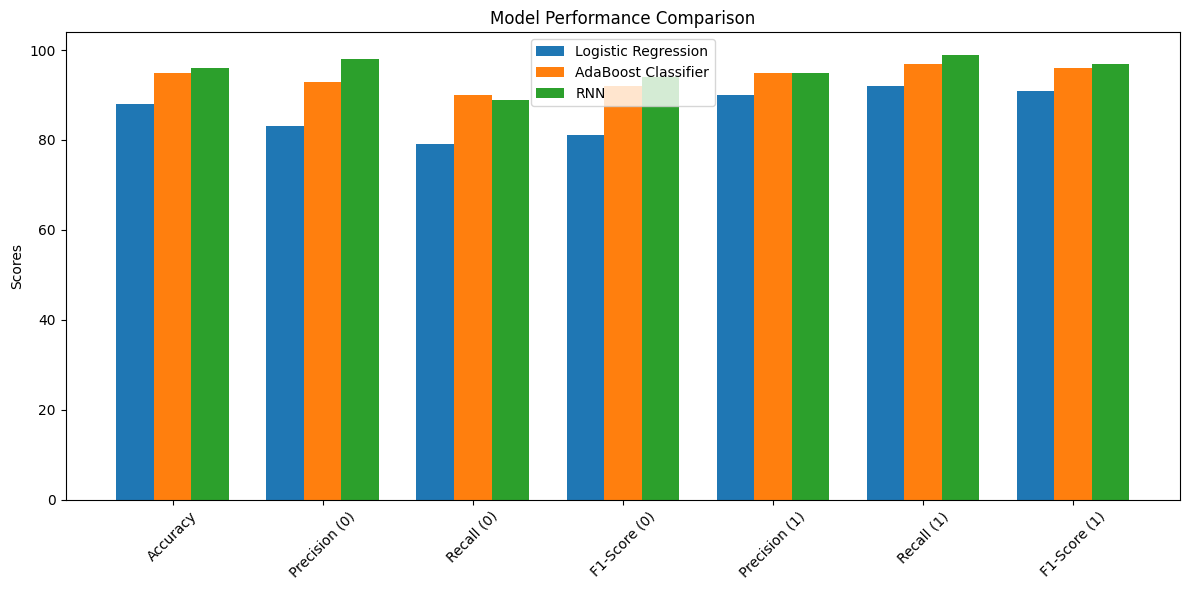

In [67]:
metrics = ["Accuracy", "Precision (0)", "Recall (0)", "F1-Score (0)", "Precision (1)", "Recall (1)", "F1-Score (1)"]
logistic = [88, (0.83 /1) * 100, (0.79/1) * 100, (0.81 /1) * 100, (0.90 /1) * 100, (0.92/1) * 100, (0.91/1) * 100]
adaboost = [95, (0.93 / 1) * 100, (0.90/1) * 100, (0.92/1) * 100, (0.95 /1) *100, (0.97/1)*100, (0.96/1)*100]
rnn = [96, (0.98/1)*100, (0.89 /1) * 100, (0.94 /1 )*100, (0.95/1) * 100, (0.99/1) *100, (0.97 /1) * 100]

x = np.arange(len(metrics)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, logistic, width, label="Logistic Regression")
rects2 = ax.bar(x, adaboost, width, label="AdaBoost Classifier")
rects3 = ax.bar(x + width, rnn, width, label="RNN")

ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()